In [3]:
#Import of libraries
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
# DEBUG: Test version
print(nx.__version__)
print(sc.__version__)

2.7.1
1.8.0


----
# 1. Define setup 
In this part, we define the variables used for controlling the application. By doing this, we are trying to make sure that we don't have to modify the rest of the code.

In [28]:
# Define for which euclidian distances (in meters) the near-repeat networks should be created
proximity_distance = [
    200,
    300,
    400
]

# Define for which period (in days) the near-repeat networks should be created
proximity_time = [
    14
]

crime_groups = [
    'burglary_business',
    'burglary_residence'
]

# A list of network properties we want to investigate
list_network_properties_headers = [
    'centrality',
    'centrality_degree',
    'centrality_eigenvector',
    'centrality_closeness',
    'centrality_betweenness',
    'clustering_coefficient',
    'assortativity'
]

PATH_TO_DATA = '../assets/data/prepared/denver_prepared.csv'  # Change if needed

----
# 2. Data import
Load the data set, that was prepared in '1_data_prep'

In [102]:
df = pd.read_csv(PATH_TO_DATA, delimiter=',')
df.head(5)

id                   crime_type crime_cat  district  precinct  \
0  20162874   burglary-business-by-force  burglary         2       222   
1  20166879  burglary-residence-no-force  burglary         3       322   
2  20163184   burglary-business-by-force  burglary         6       611   
3  20164917  burglary-residence-by-force  burglary         3       322   
4  20163610  burglary-residence-by-force  burglary         3       321   

               neighborhood            timestamp        long        lat  \
0                 montclair  2016-01-02 05:00:00 -104.914776  39.737851   
1  washington-virginia-vale  2016-01-02 08:35:00 -104.909504  39.691124   
2                       cbd  2016-01-02 13:38:00 -104.995367  39.741134   
3          virginia-village  2016-01-02 17:00:00 -104.904795  39.681983   
4                   hilltop  2016-01-02 17:55:00 -104.928957  39.720677   

                crime  ... day14_300m  day14_300m_mintindex  \
0   burglary_business  ...          0                     0   
1  burglary_residence  ...          0                     0   
2   burglary_business  ...          0                     0   
3  burglary_residence  ...          0                     0   
4  burglary_residence  ...          0                     0   

   day14_300m_mintindex_mentions  day14_300m_mintdate day14_300m_mintdatediff  \
0                              0                  NaN                       0   
1                              0                  NaN                       0   
2                              0                  NaN                       0   
3                              0                  NaN                       0   
4                              0                  NaN                       0   

  day14_400m day14_400m_mintindex  day14_400m_mintindex_mentions  \
0          0                    0                              0   
1          0                    0                              0   
2          0                    0                              0   
3          0                    0                              0   
4          0                    0                              0   

   day14_400m_mintdate  day14_400m_mintdatediff  
0                  NaN                        0  
1                  NaN                        0  
2                  NaN                        0  
3                  NaN                        0  
4                  NaN                        0  

[5 rows x 33 columns]

----
# 4. Create network models
TODO: description

In [78]:
def draw_network(df_a, distance):
    G = nx.Graph()
    
    for index, row in df_a.loc[df_a[f'day14_{distance}m'] >= 2].iterrows():
        index_row = row['id']
        G.add_node(index_row)   

        mintindex_row = row[f'day14_{distance}m_mintindex']
        if mintindex_row:
            G.add_edge(index_row, mintindex_row)

    print(f'Nodes {crime} {distance}m: {G.number_of_nodes()}')
    print(f'Edges {crime} {distance}m: {G.number_of_edges()}')

    nodesize = 75
    width = 1
    figsize_width = 40
    figsize_height = 30
    label = False
    fontsize = 45

    fig = plt.figure(1, figsize=(figsize_width, figsize_height), dpi=150)
    
    nx.draw(G, with_labels=label, node_size=nodesize, width=width)
    plt.show()

Nodes burglary_business 200m: 622
Edges burglary_business 200m: 345


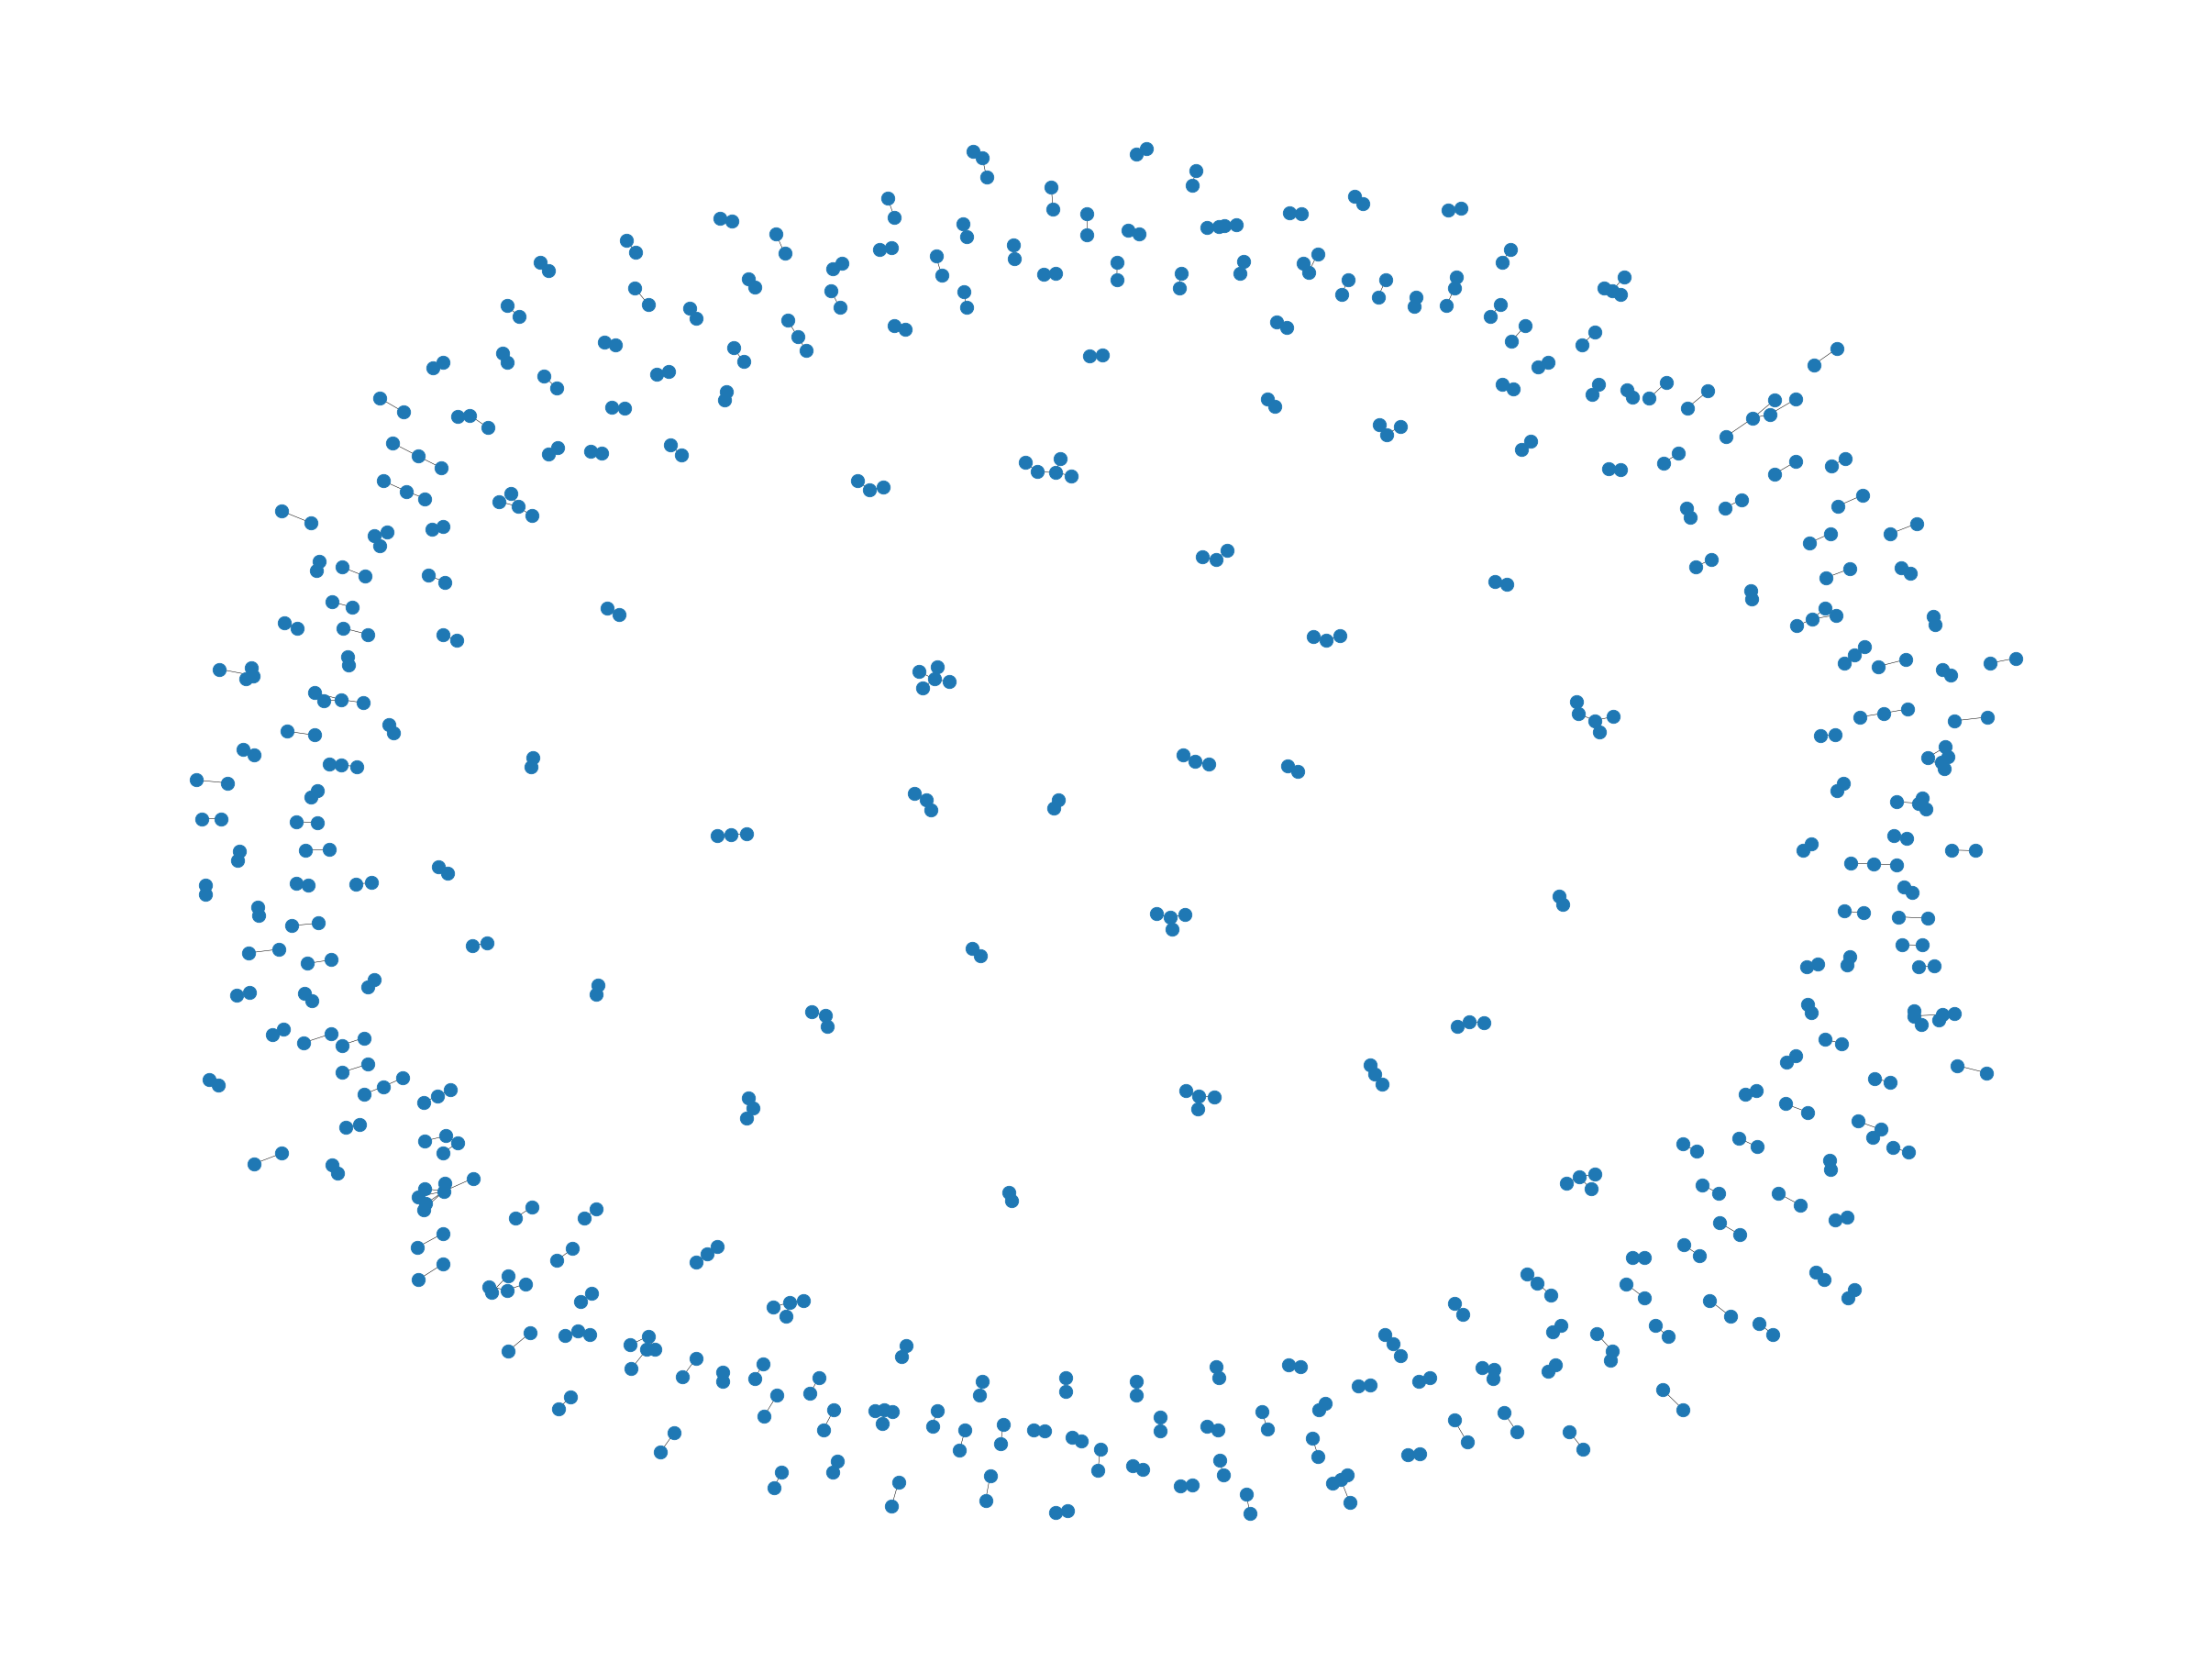

Nodes burglary_business 300m: 383
Edges burglary_business 300m: 203


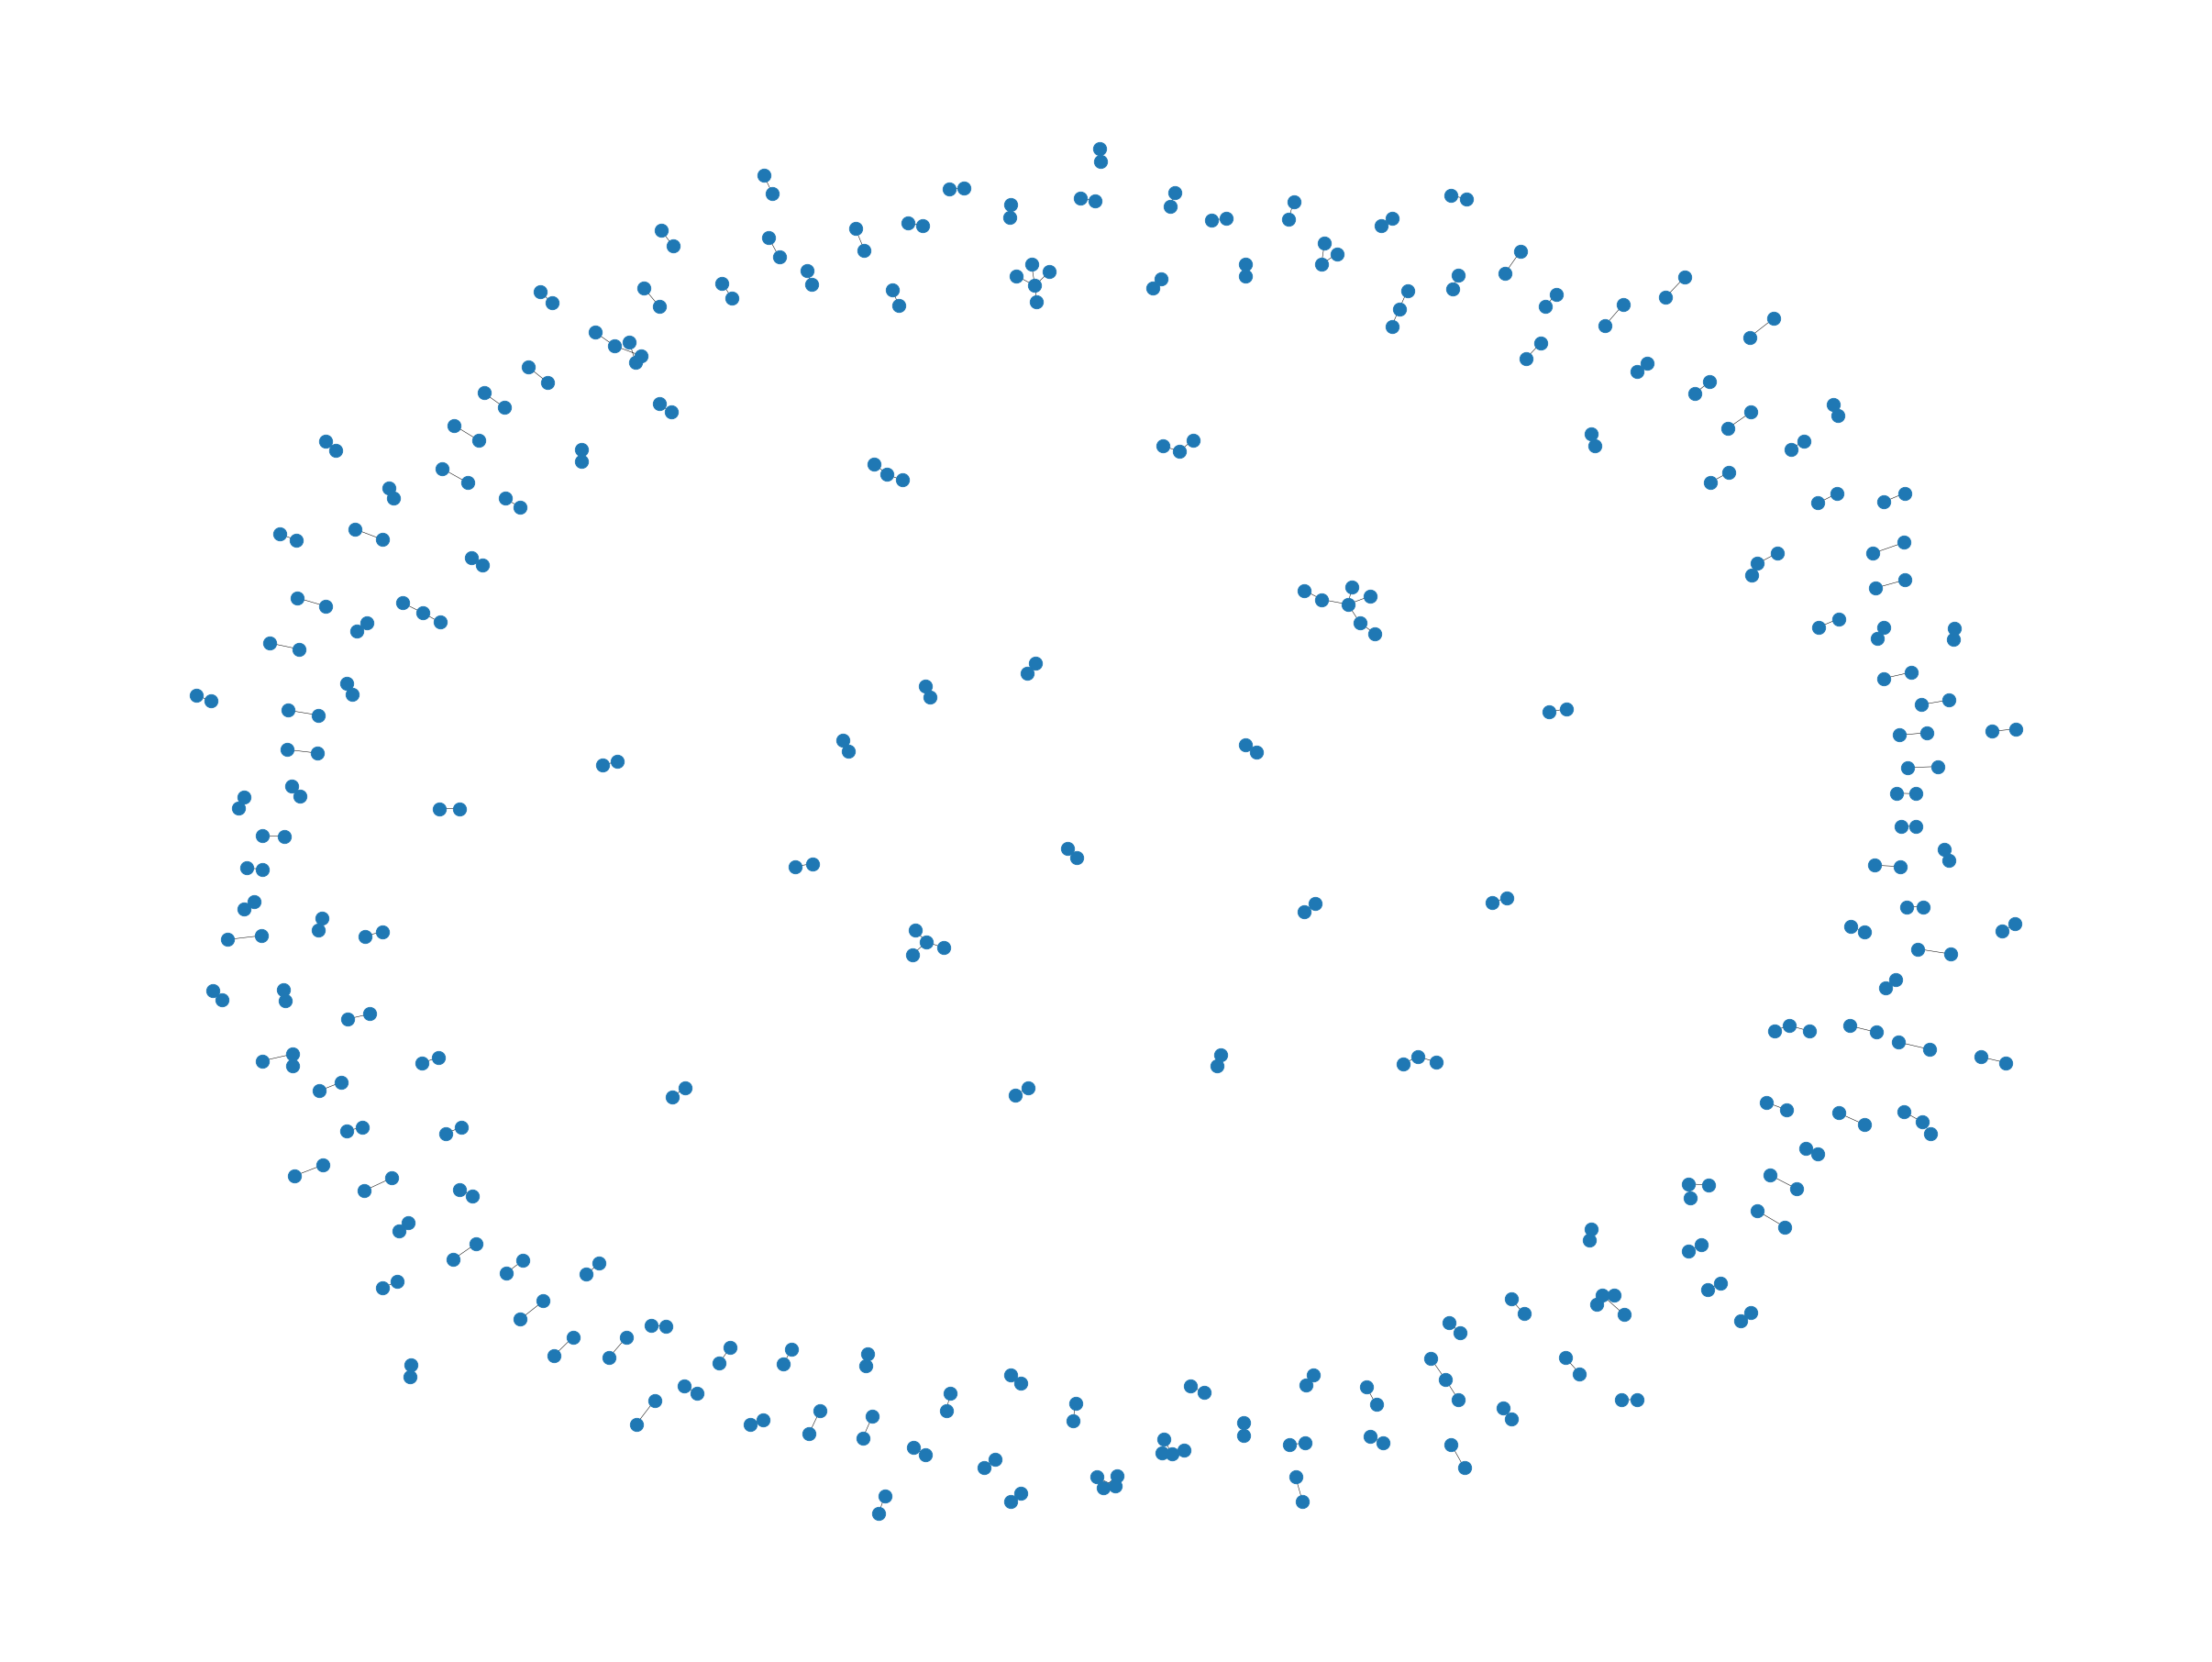

Nodes burglary_business 400m: 565
Edges burglary_business 400m: 313


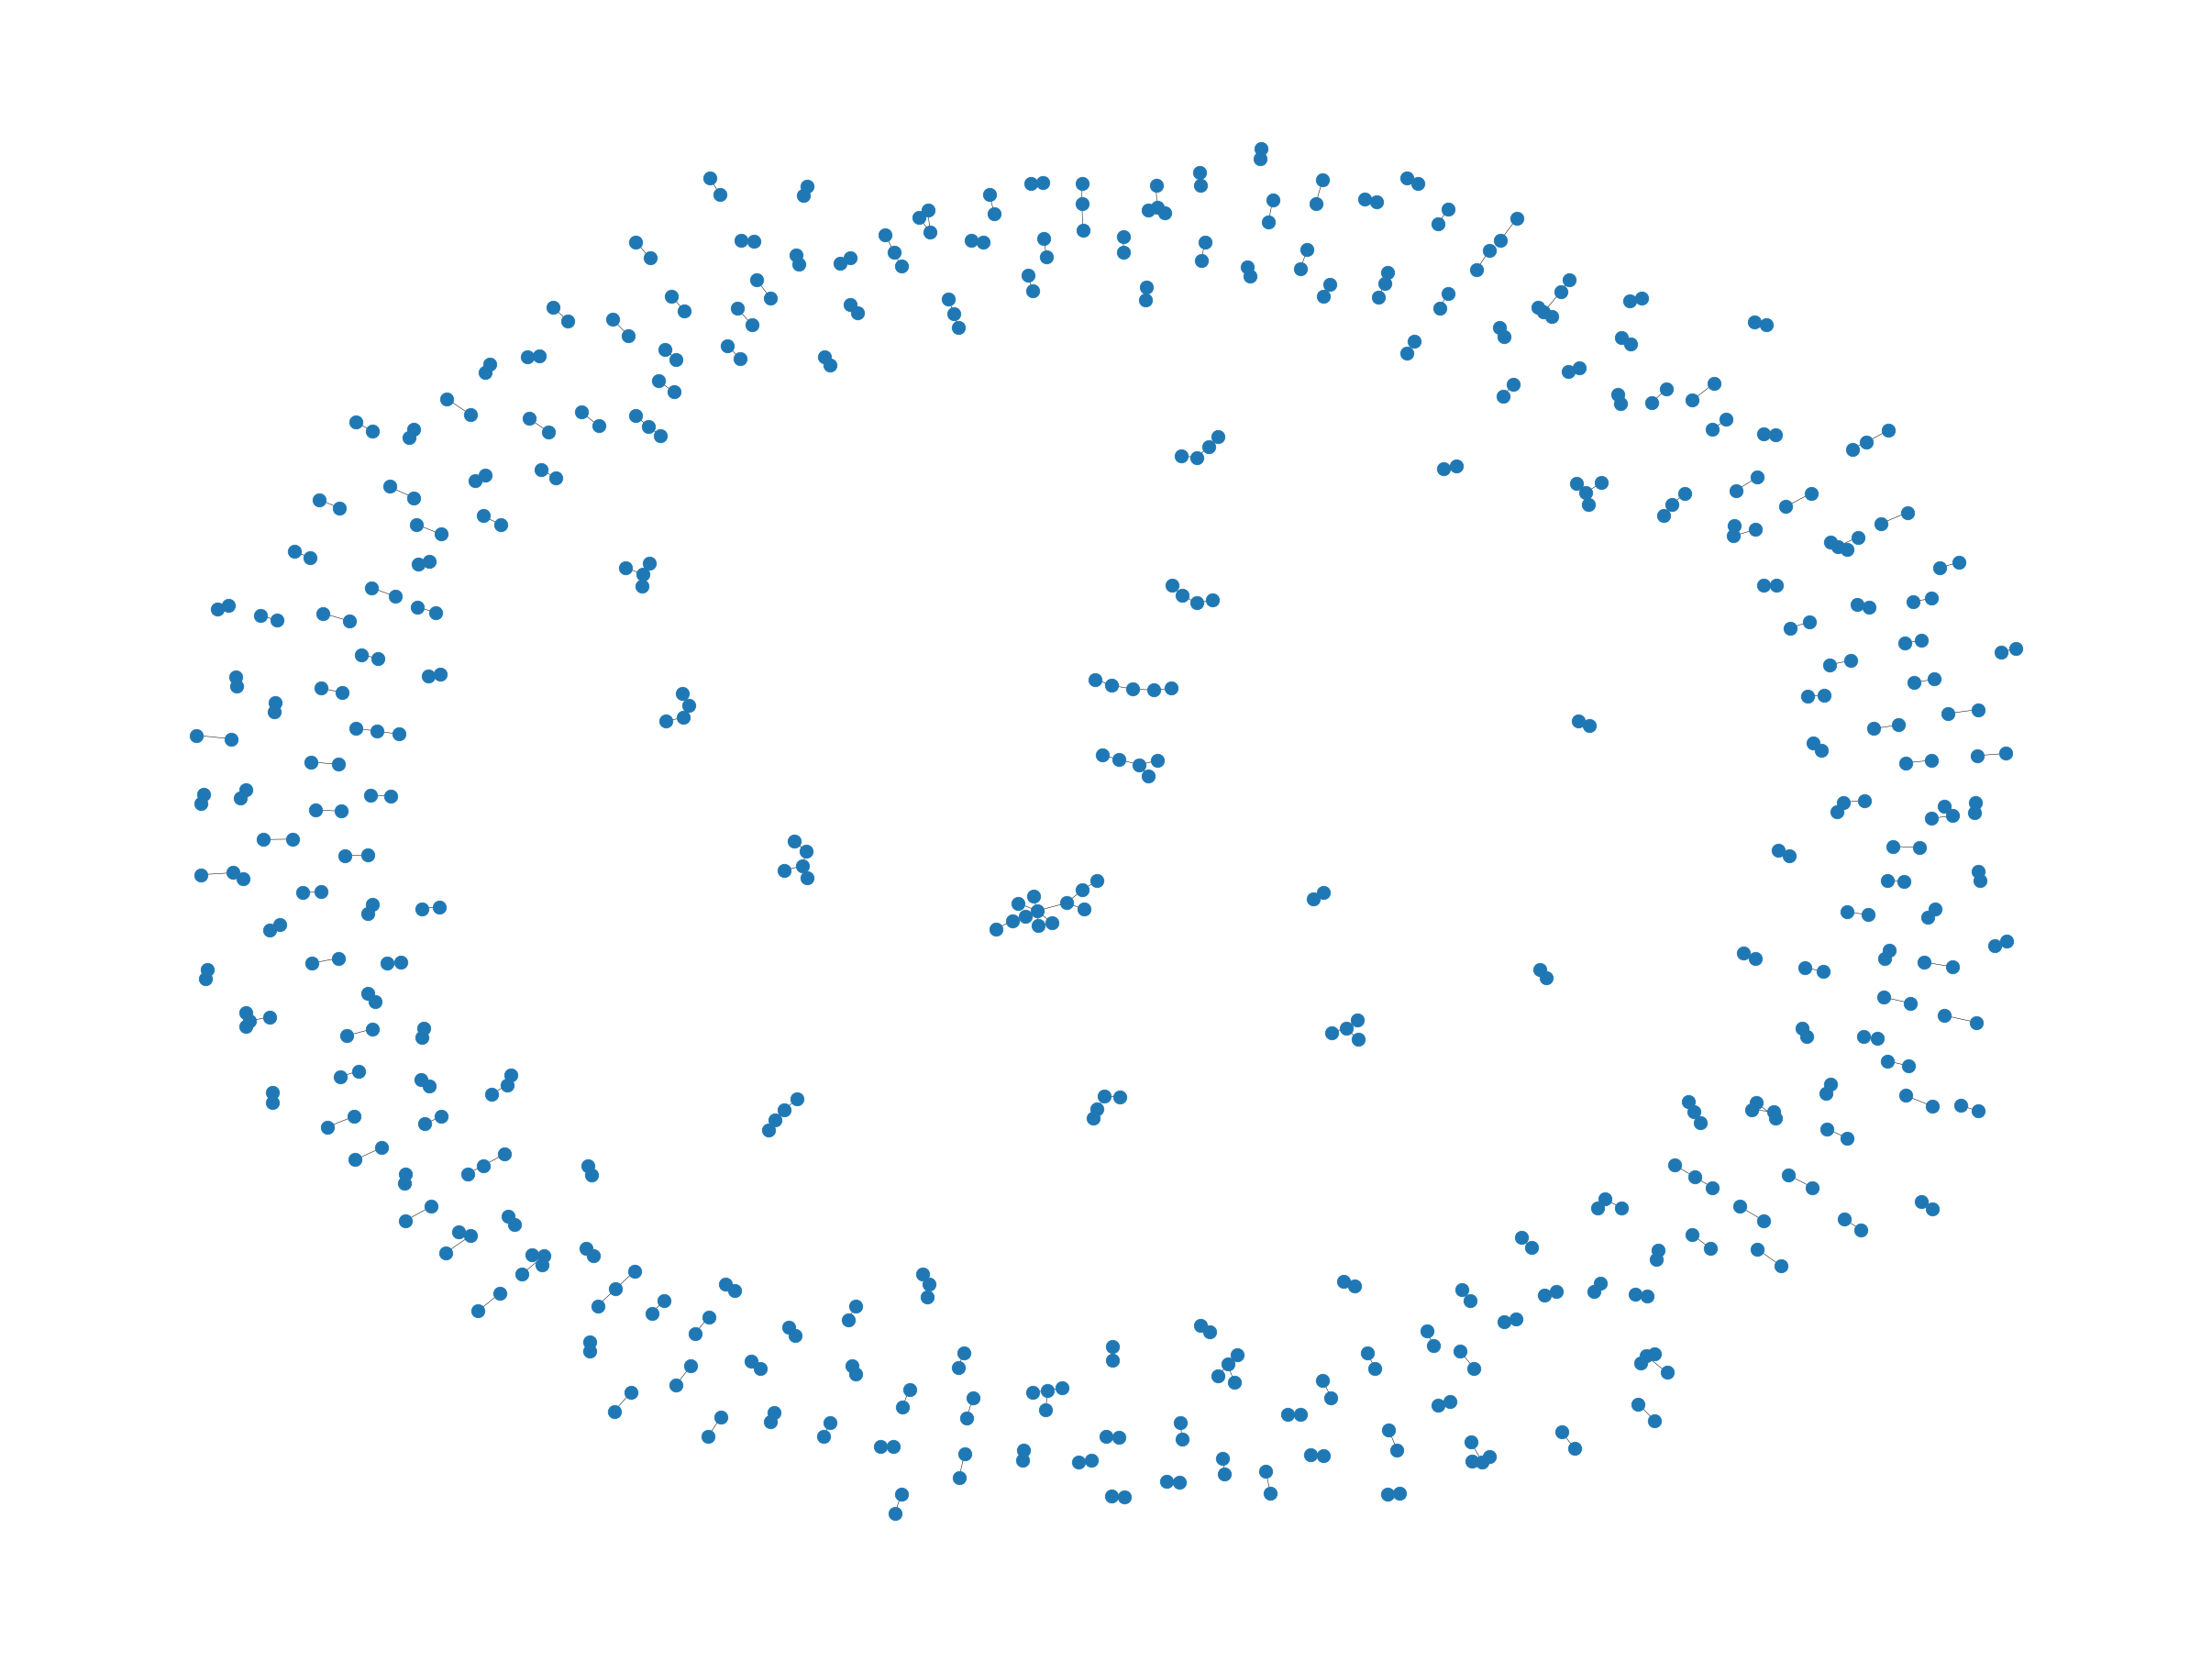

Nodes burglary_residence 200m: 858
Edges burglary_residence 200m: 482


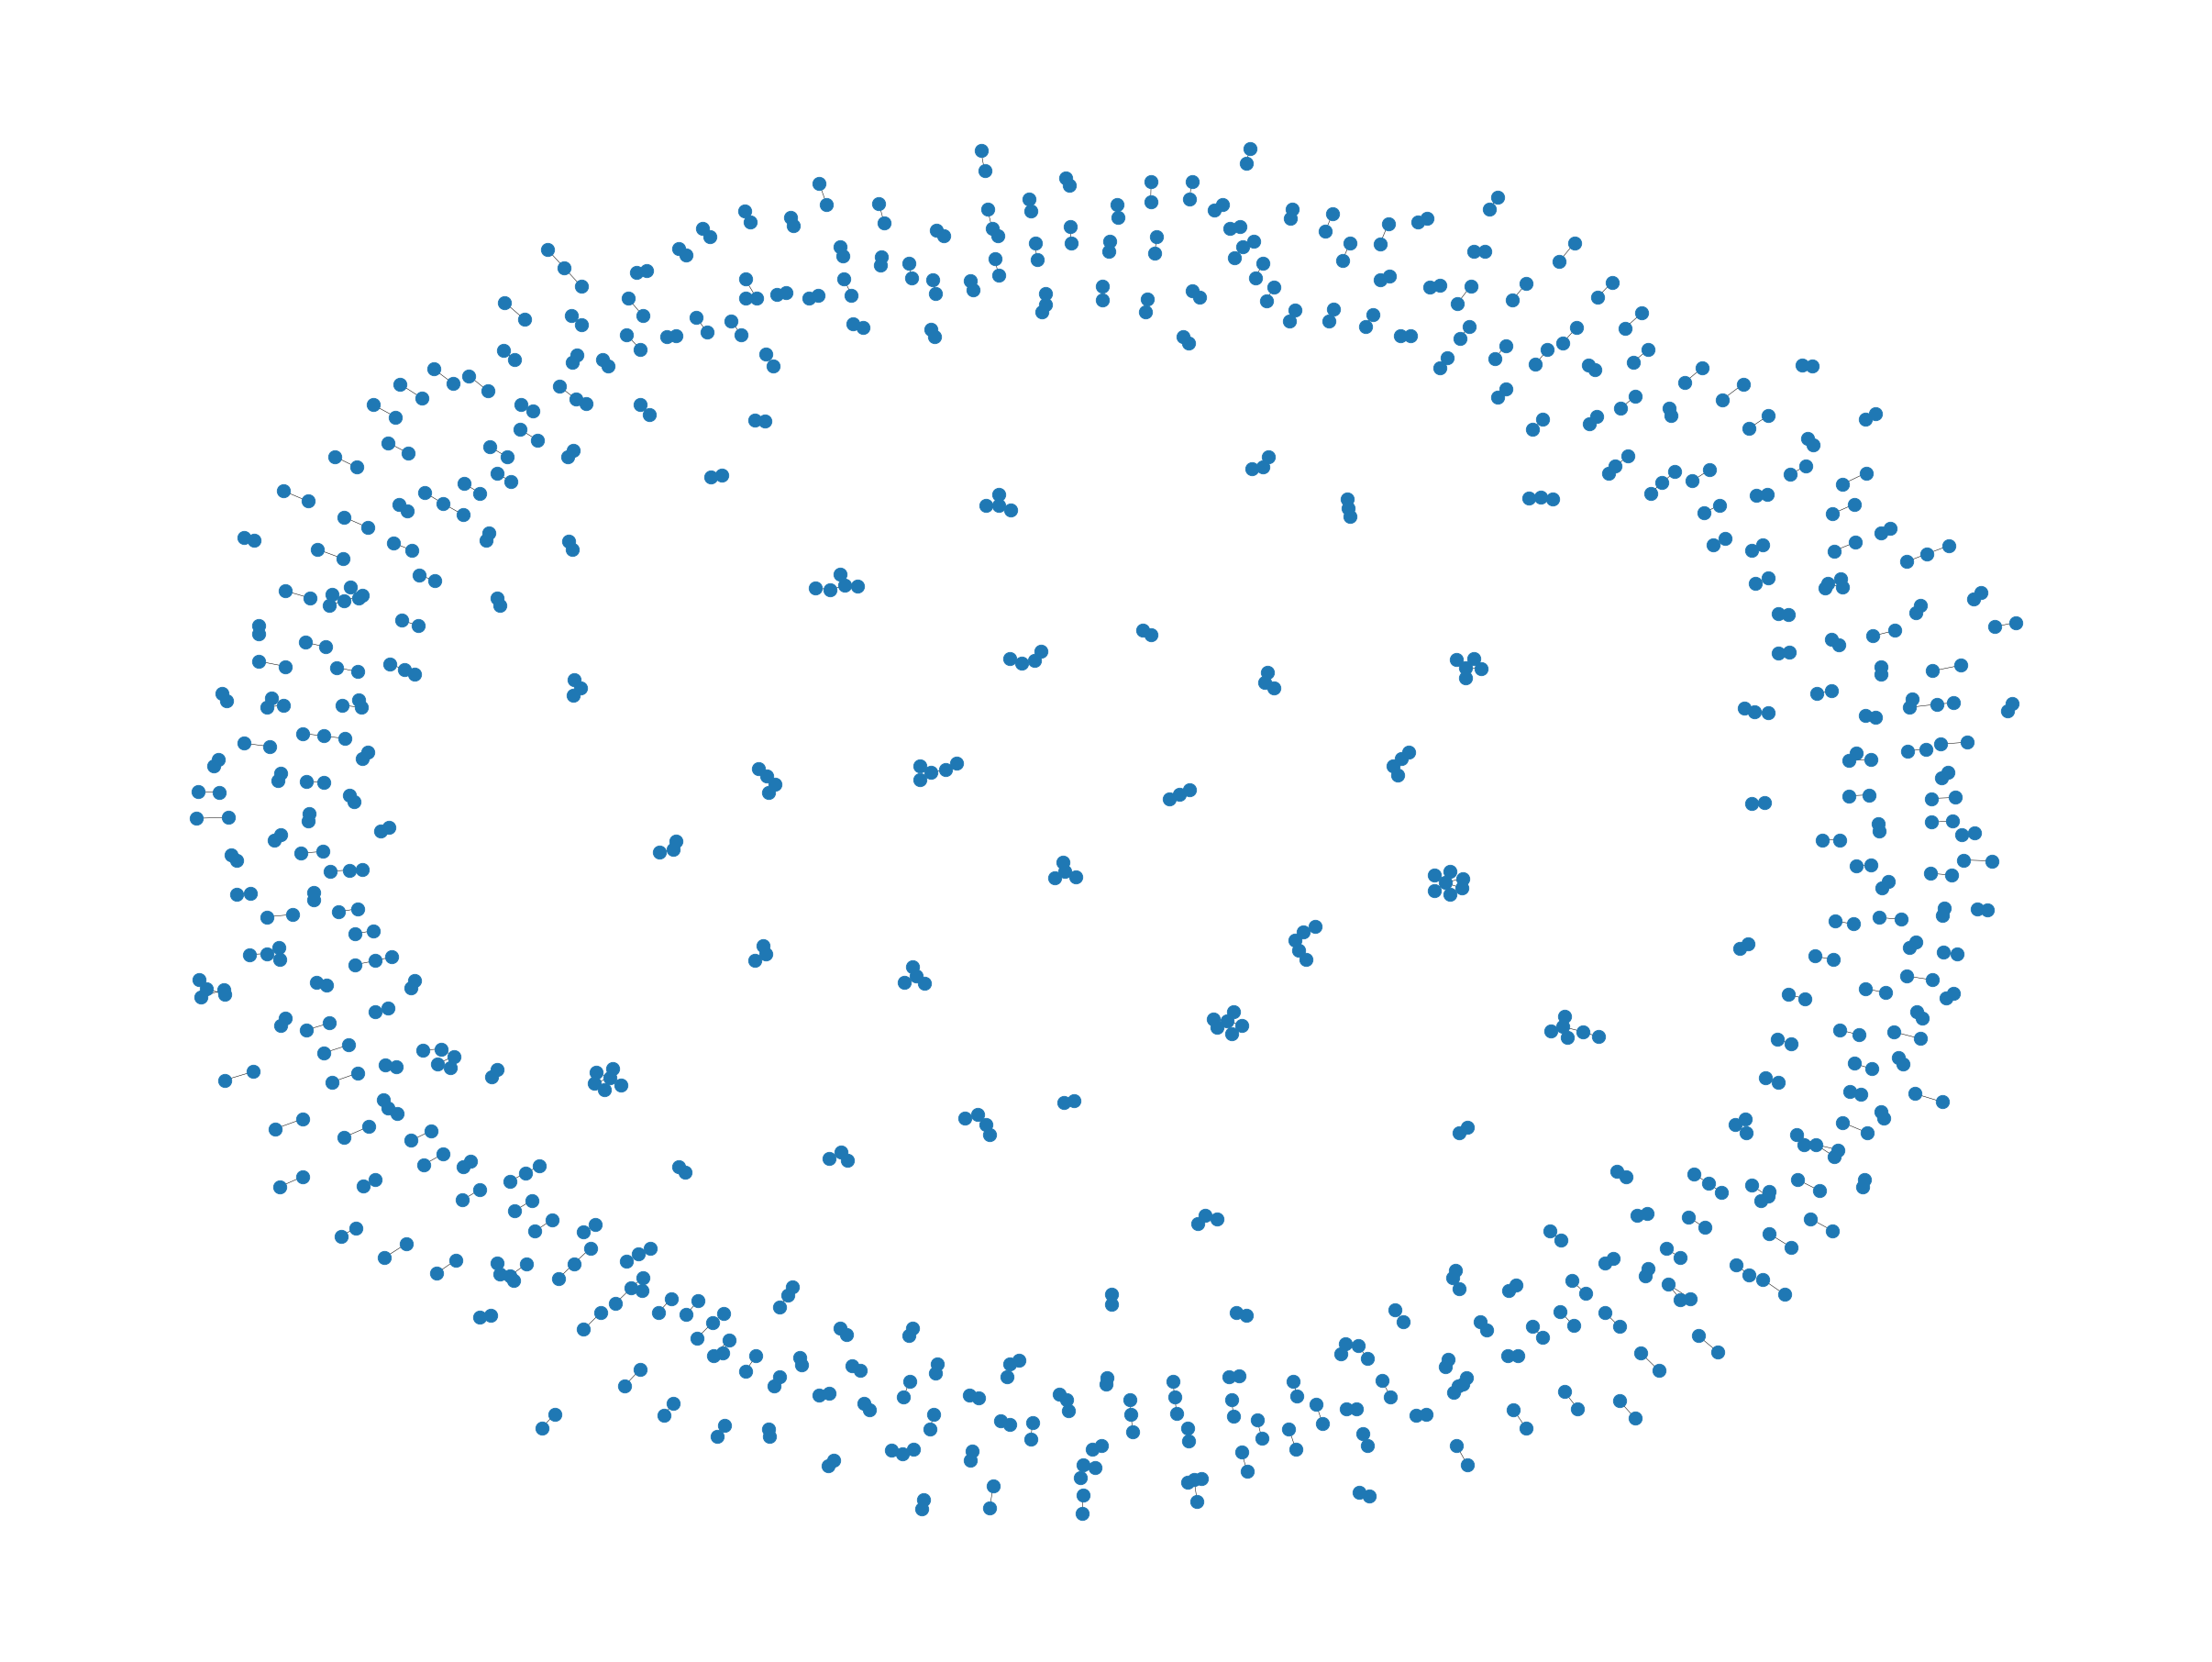

Nodes burglary_residence 300m: 565
Edges burglary_residence 300m: 307


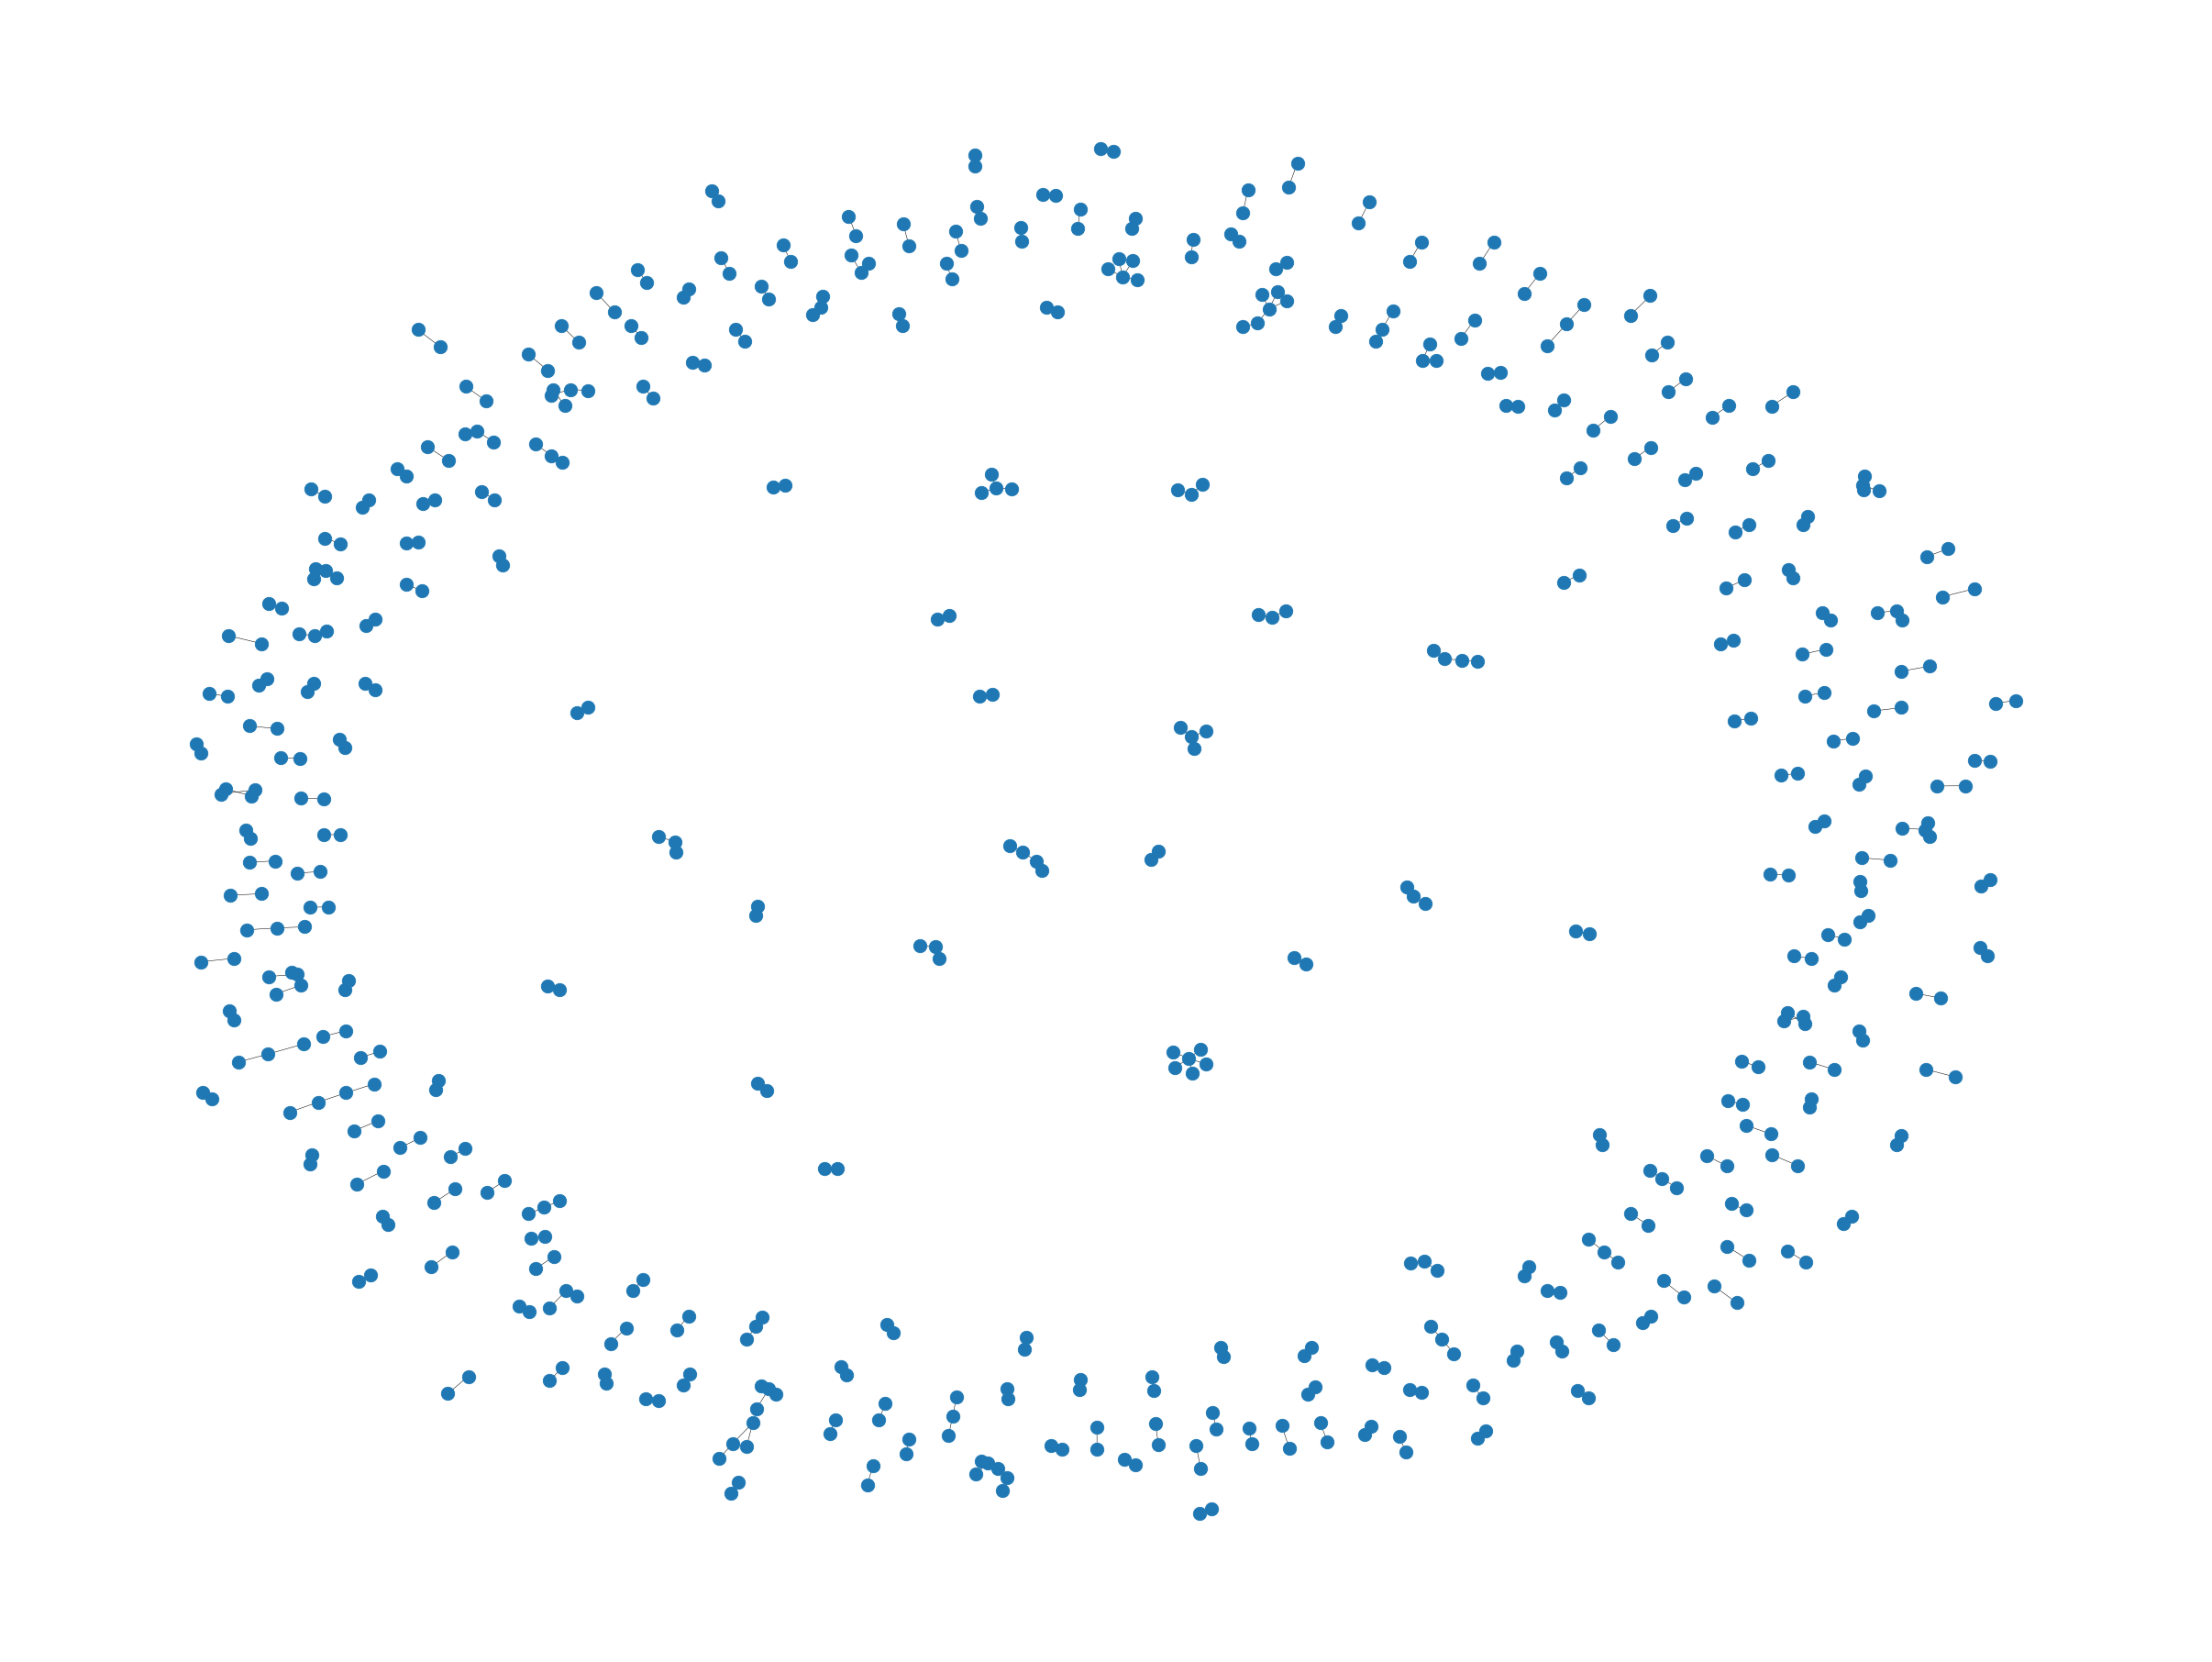

Nodes burglary_residence 400m: 839
Edges burglary_residence 400m: 455


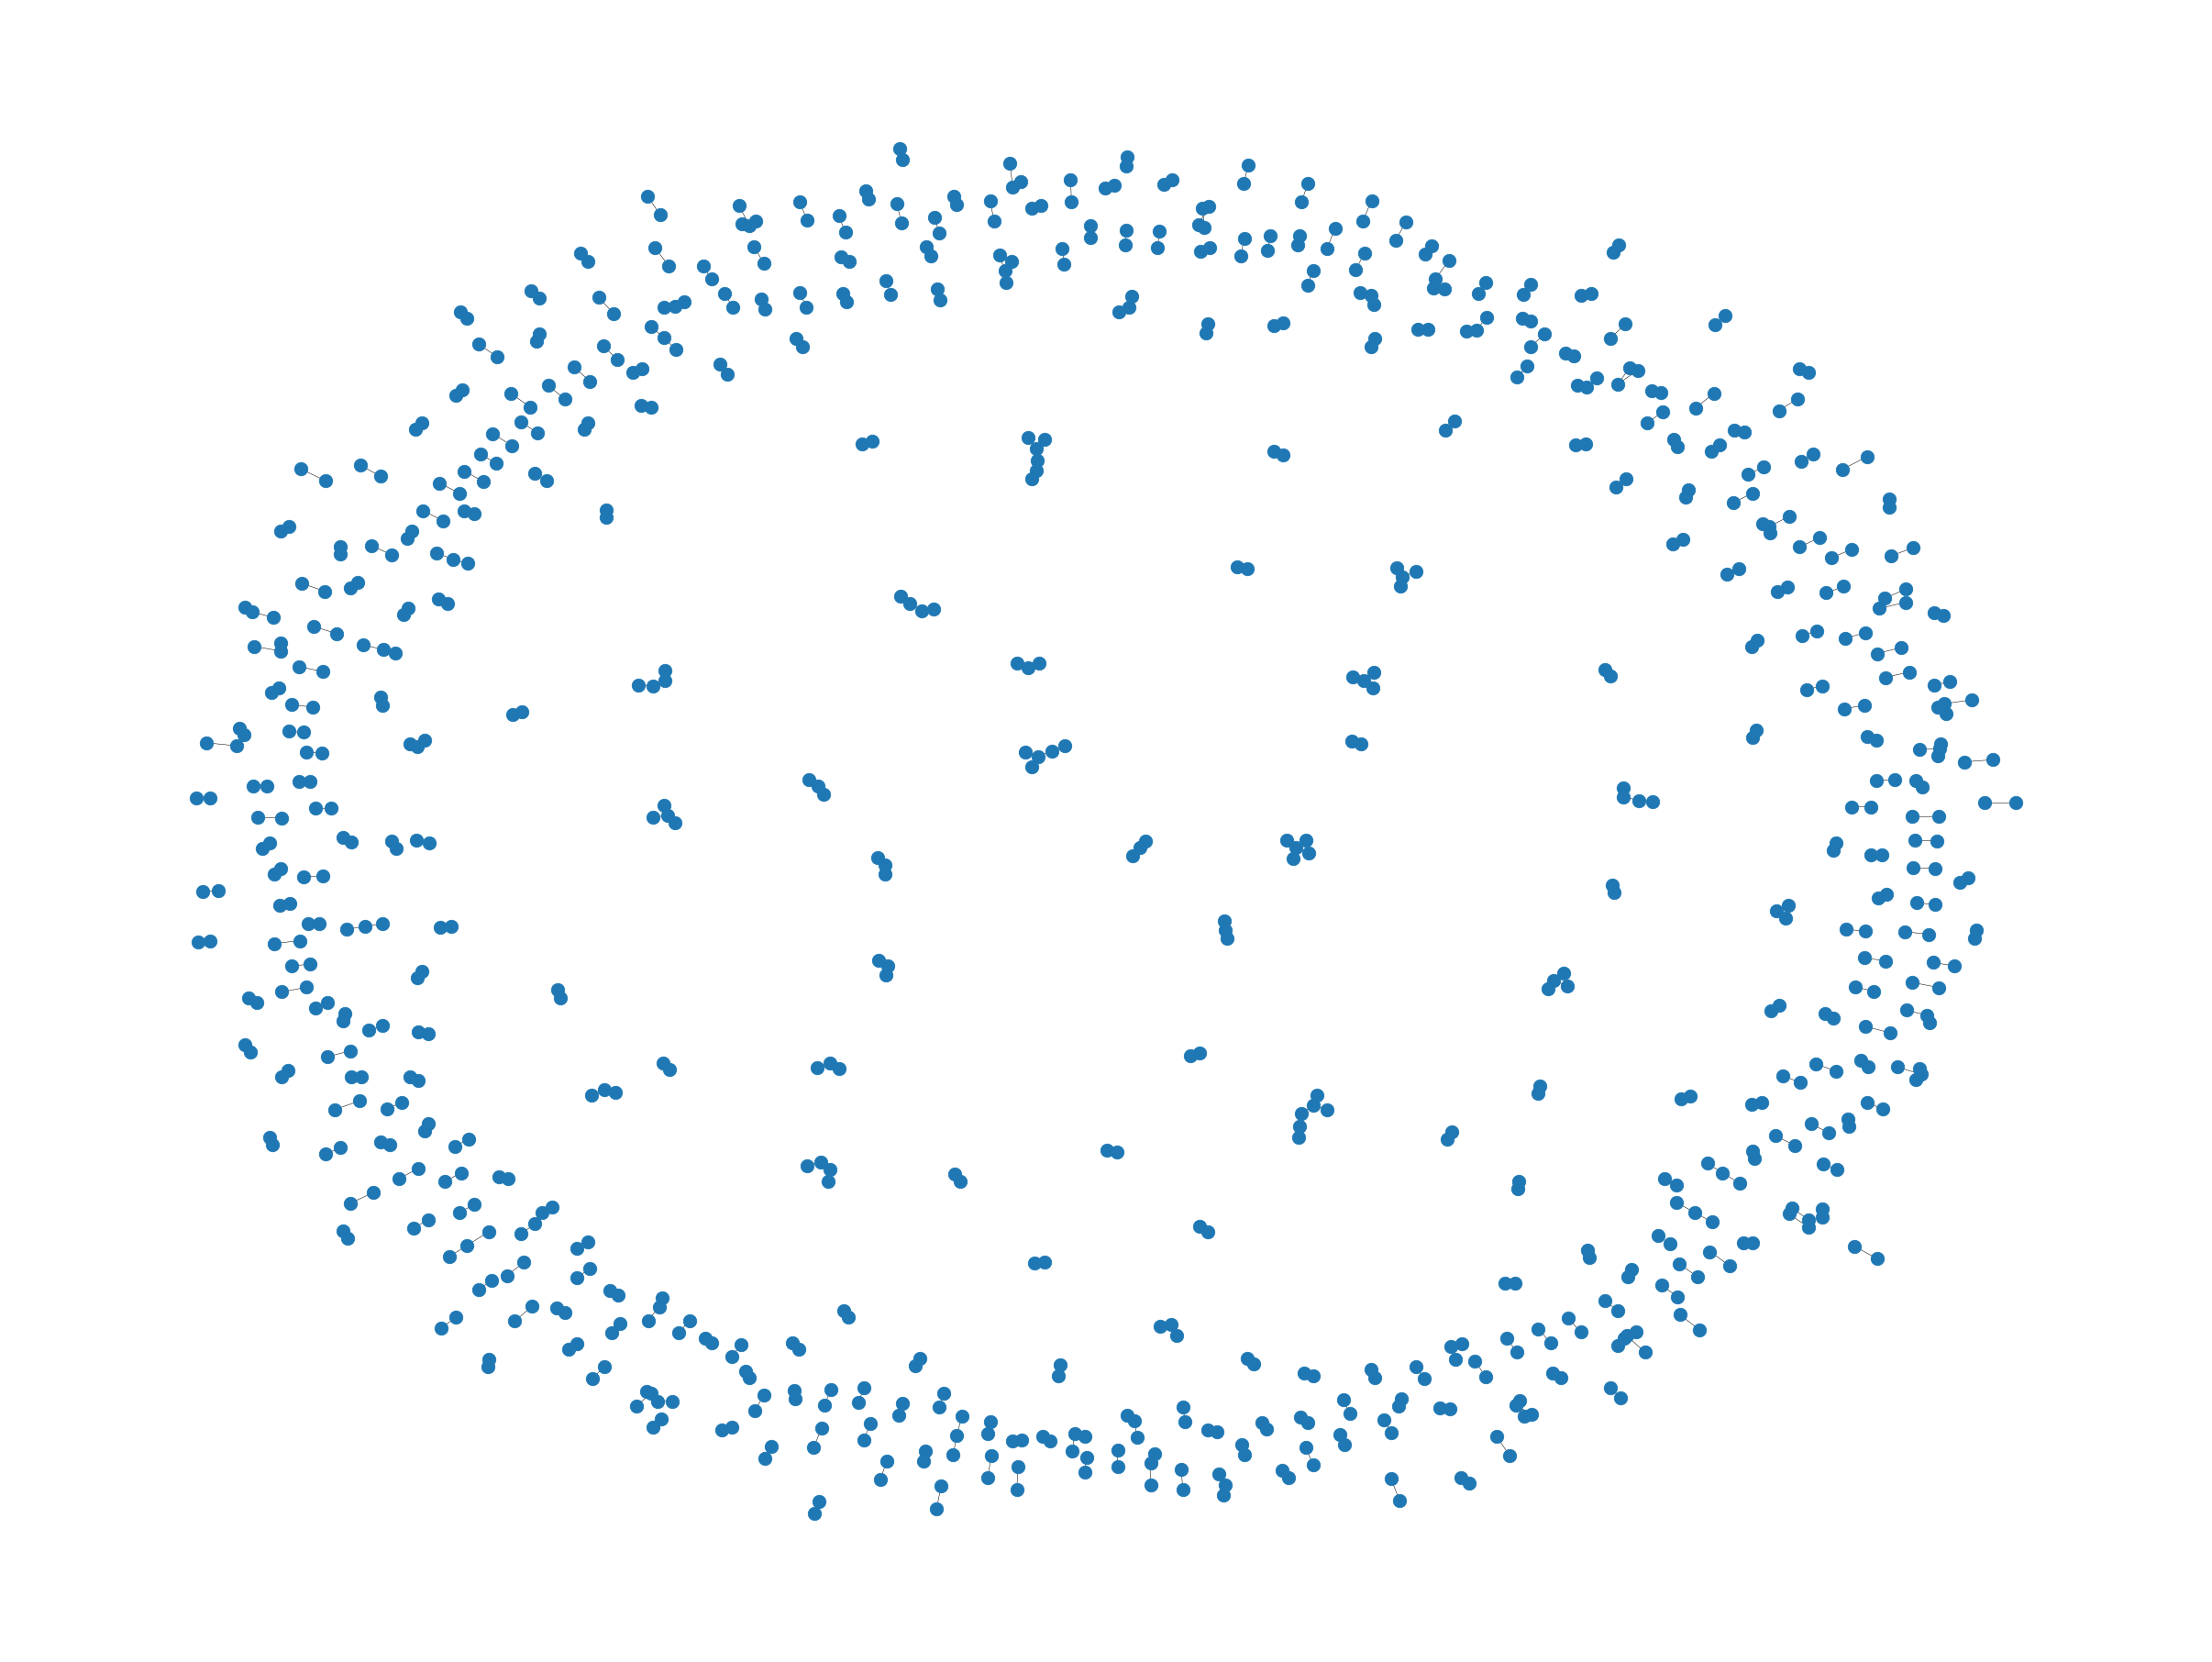

In [46]:
for crime in crime_groups:
    for distance in proximity_distance:
        df_in = df.loc[df['crime'] == crime]
        draw_network(df_in, distance)           

Nodes 200m: 1459
Edges 200m: 843


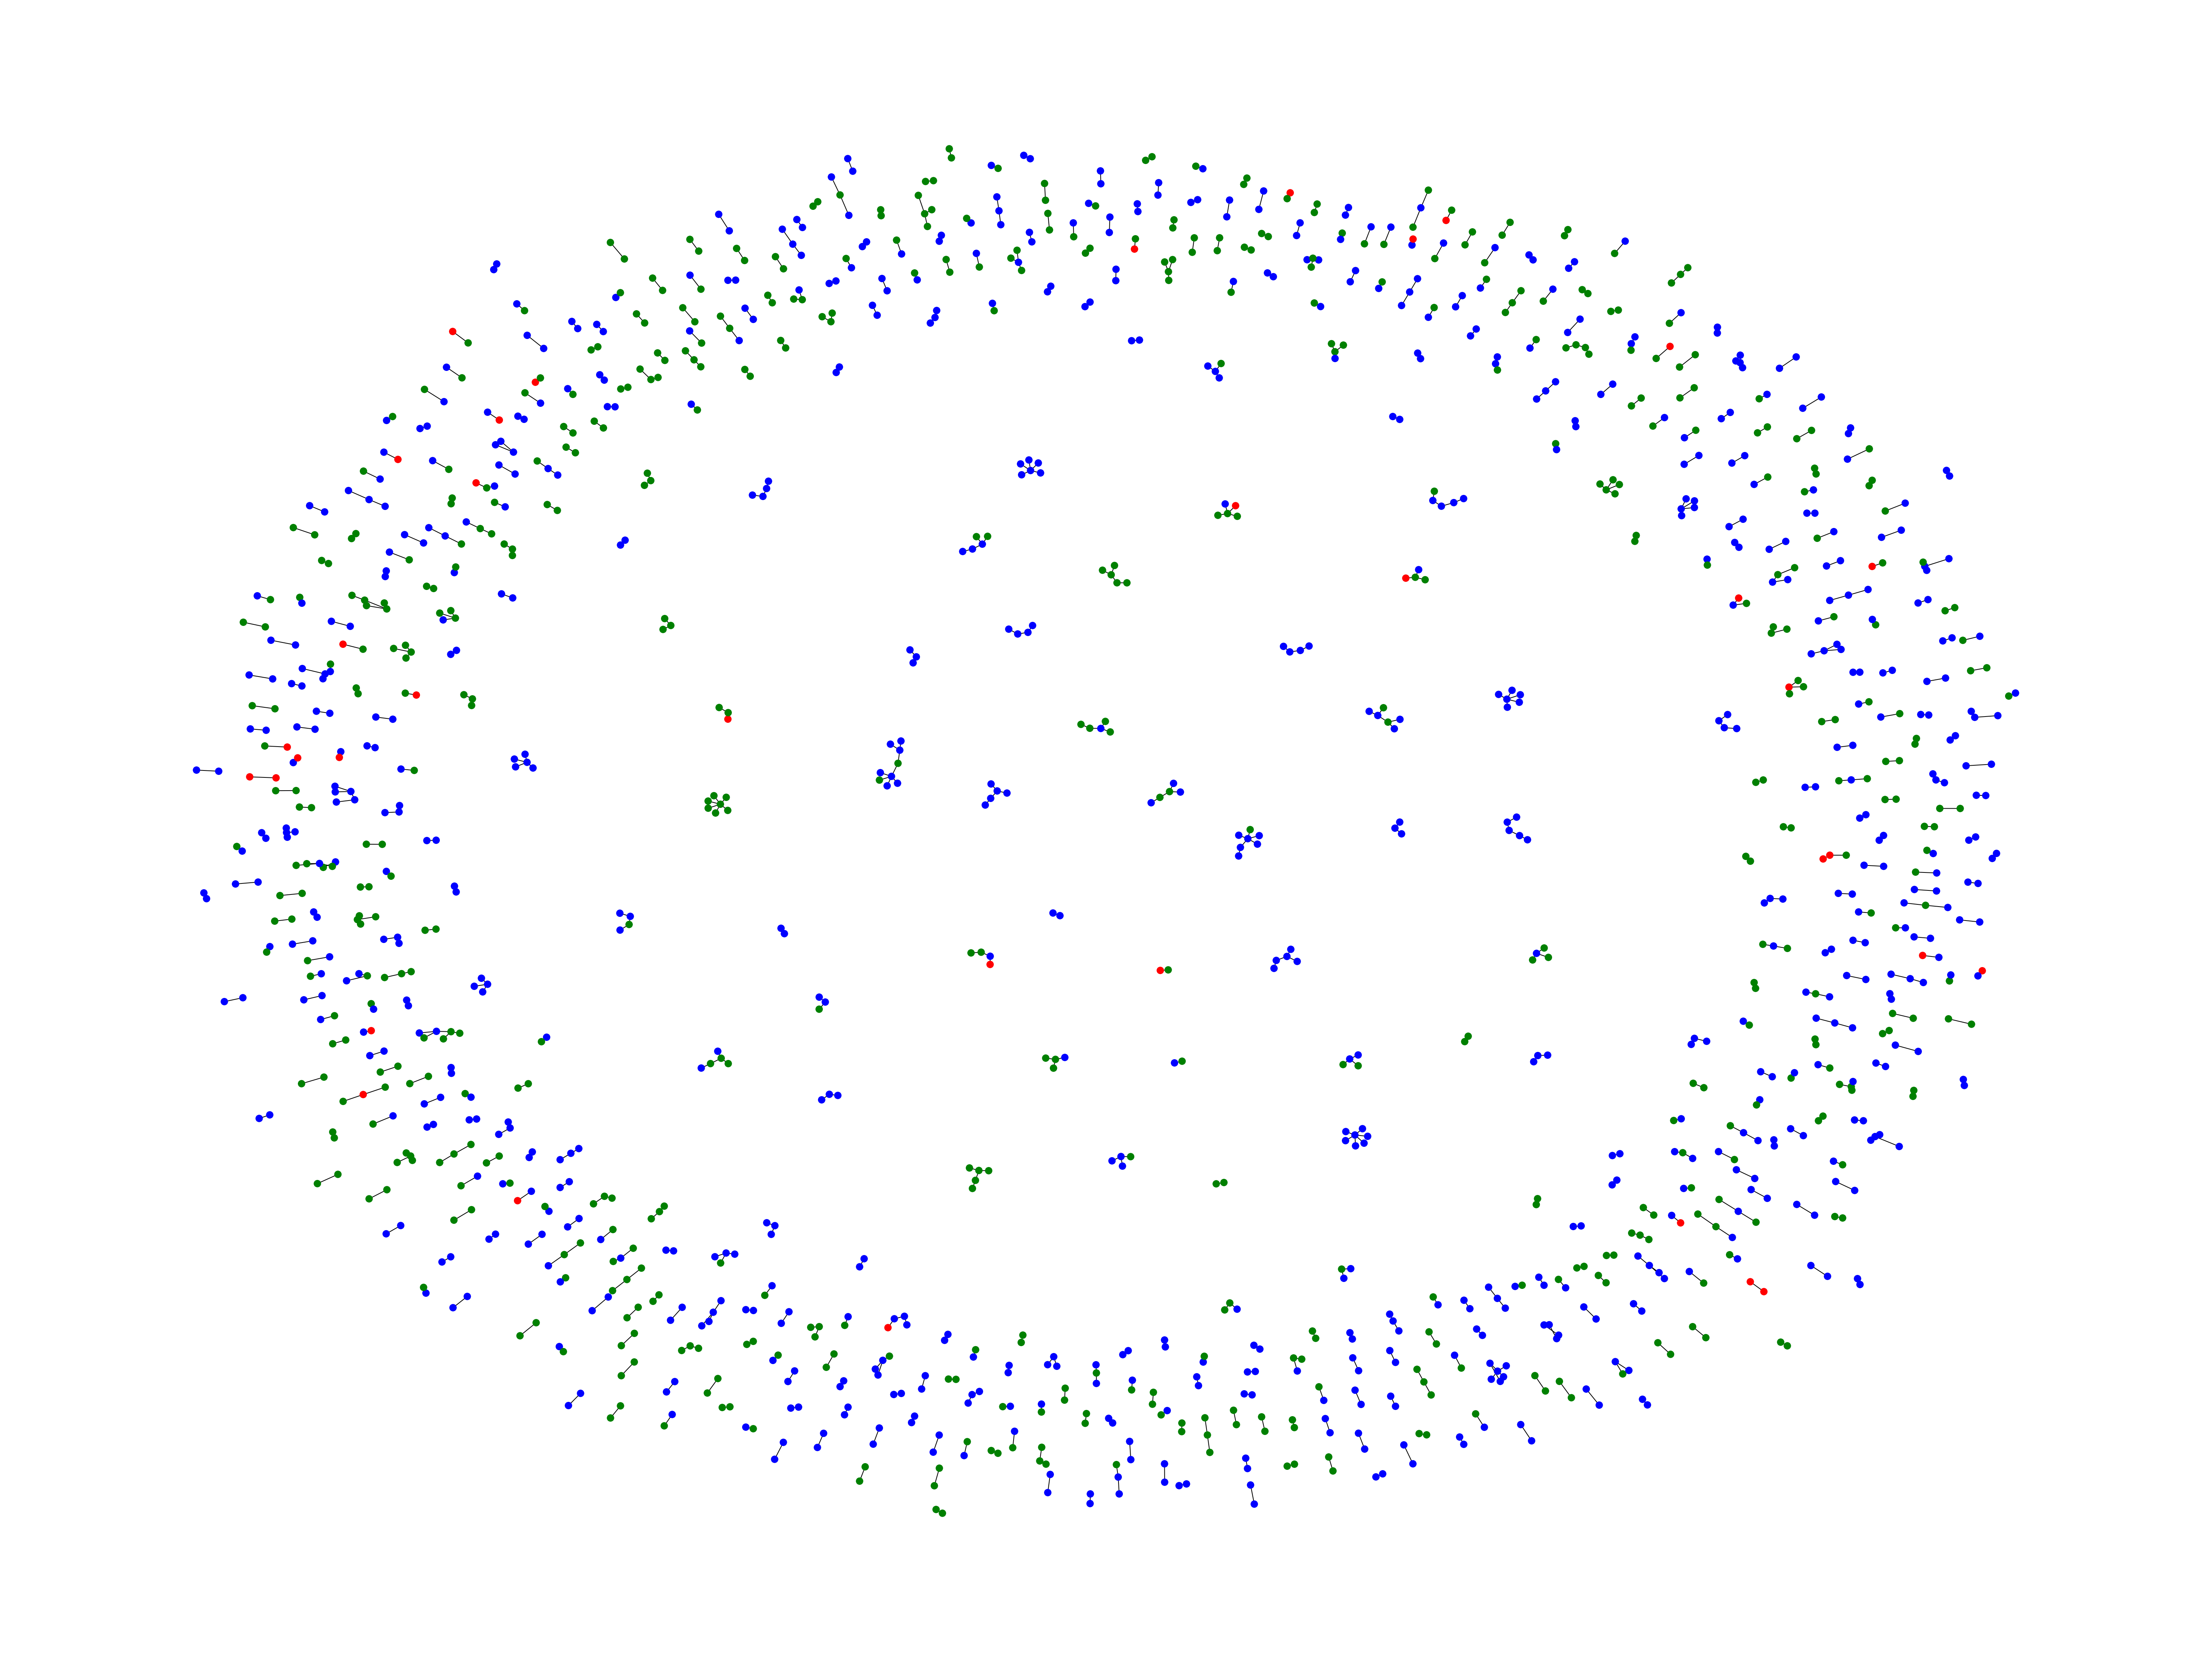

Nodes 300m: 963
Edges 300m: 526


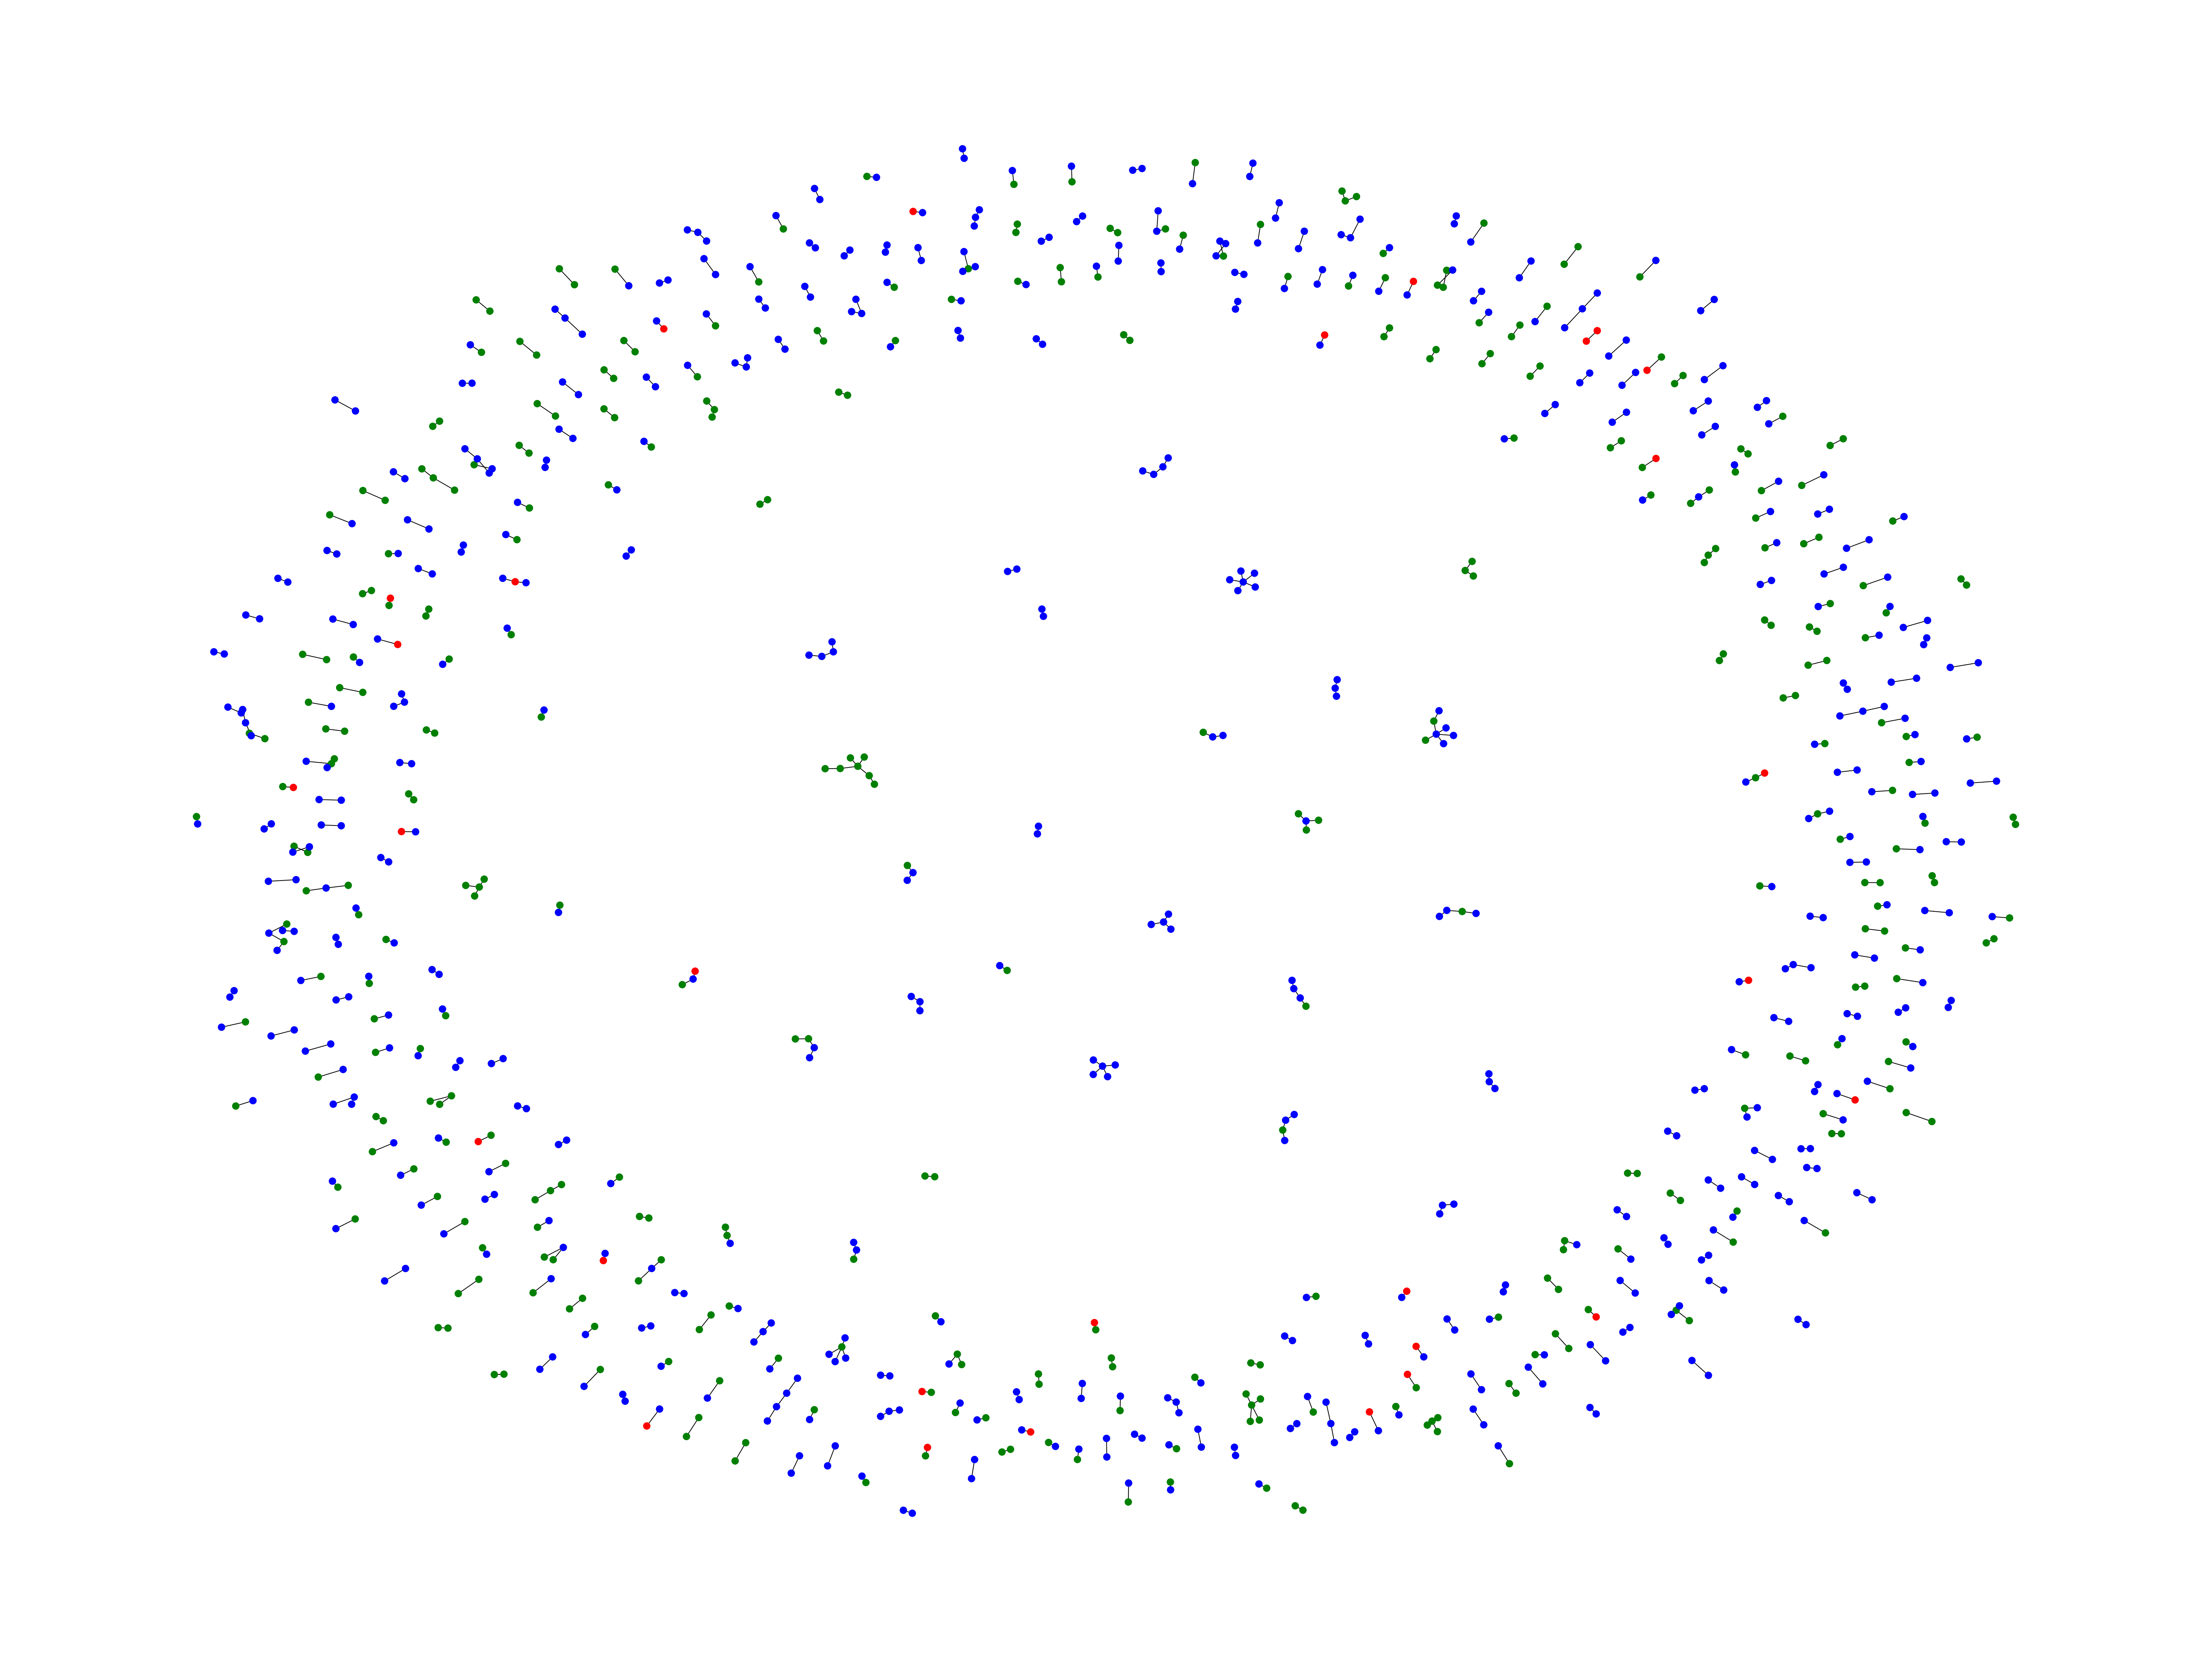

Nodes 400m: 1372
Edges 400m: 782


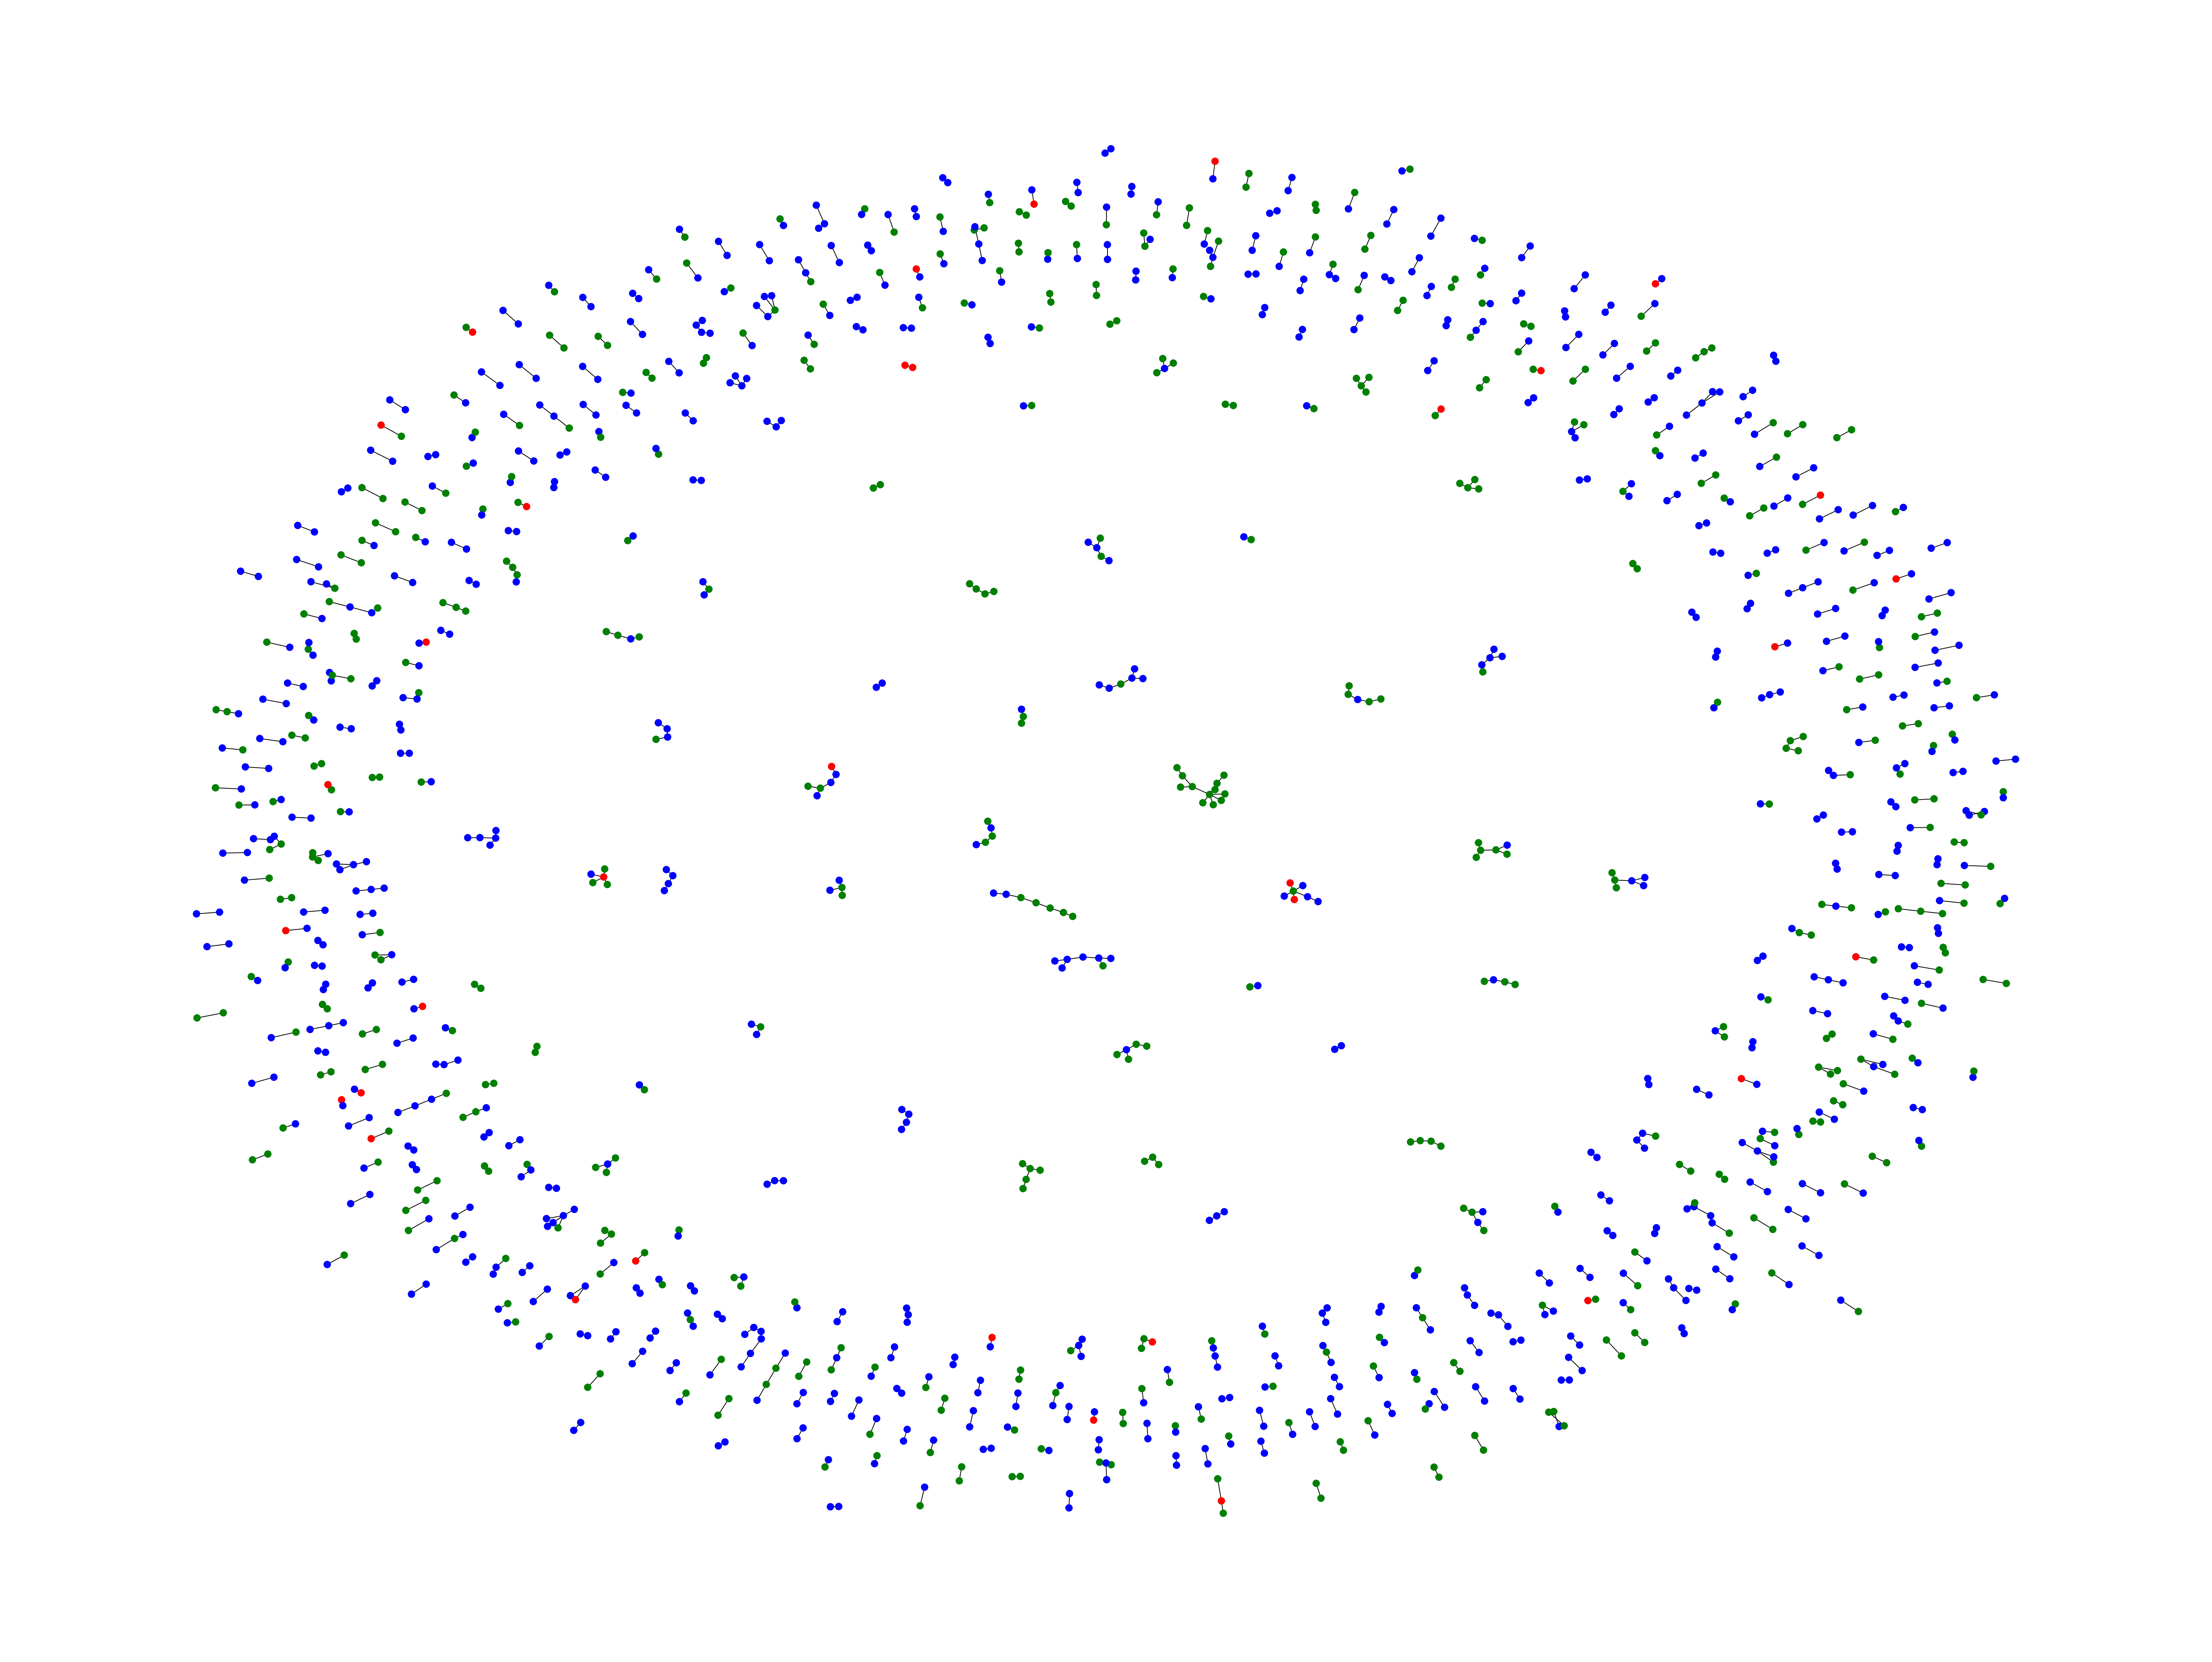

In [89]:
for distance in proximity_distance:
    G2 = nx.Graph()
    color_map = []

    for index, row in df.loc[df[f'day14_{distance}m'] >= 2].iterrows():
        index_row = row['id']
        G2.add_node(index_row)   

        mintindex_row = row[f'day14_{distance}m_mintindex']
        if mintindex_row:
            G2.add_edge(index_row, mintindex_row)

    for node in G2:
        temp = df.loc[df['id'] == node].crime.values[0]
        if temp == 'burglary_residence':
            color_map.append('blue')
        elif temp == 'burglary_business': 
            color_map.append('green')
        else:
            color_map.append('red')

    print(f'Nodes {distance}m: {G2.number_of_nodes()}')
    print(f'Edges {distance}m: {G2.number_of_edges()}')

    nodesize = 75
    width = 1
    figsize_width = 40
    figsize_height = 30
    label = False
    fontsize = 45

    fig = plt.figure(1, figsize=(figsize_width, figsize_height), dpi=150)

    nx.draw(G2, with_labels=label, node_size=nodesize, width=width, node_color=color_map)
    plt.show()

Color 13511
Nodes: 13511
Edges: 11336


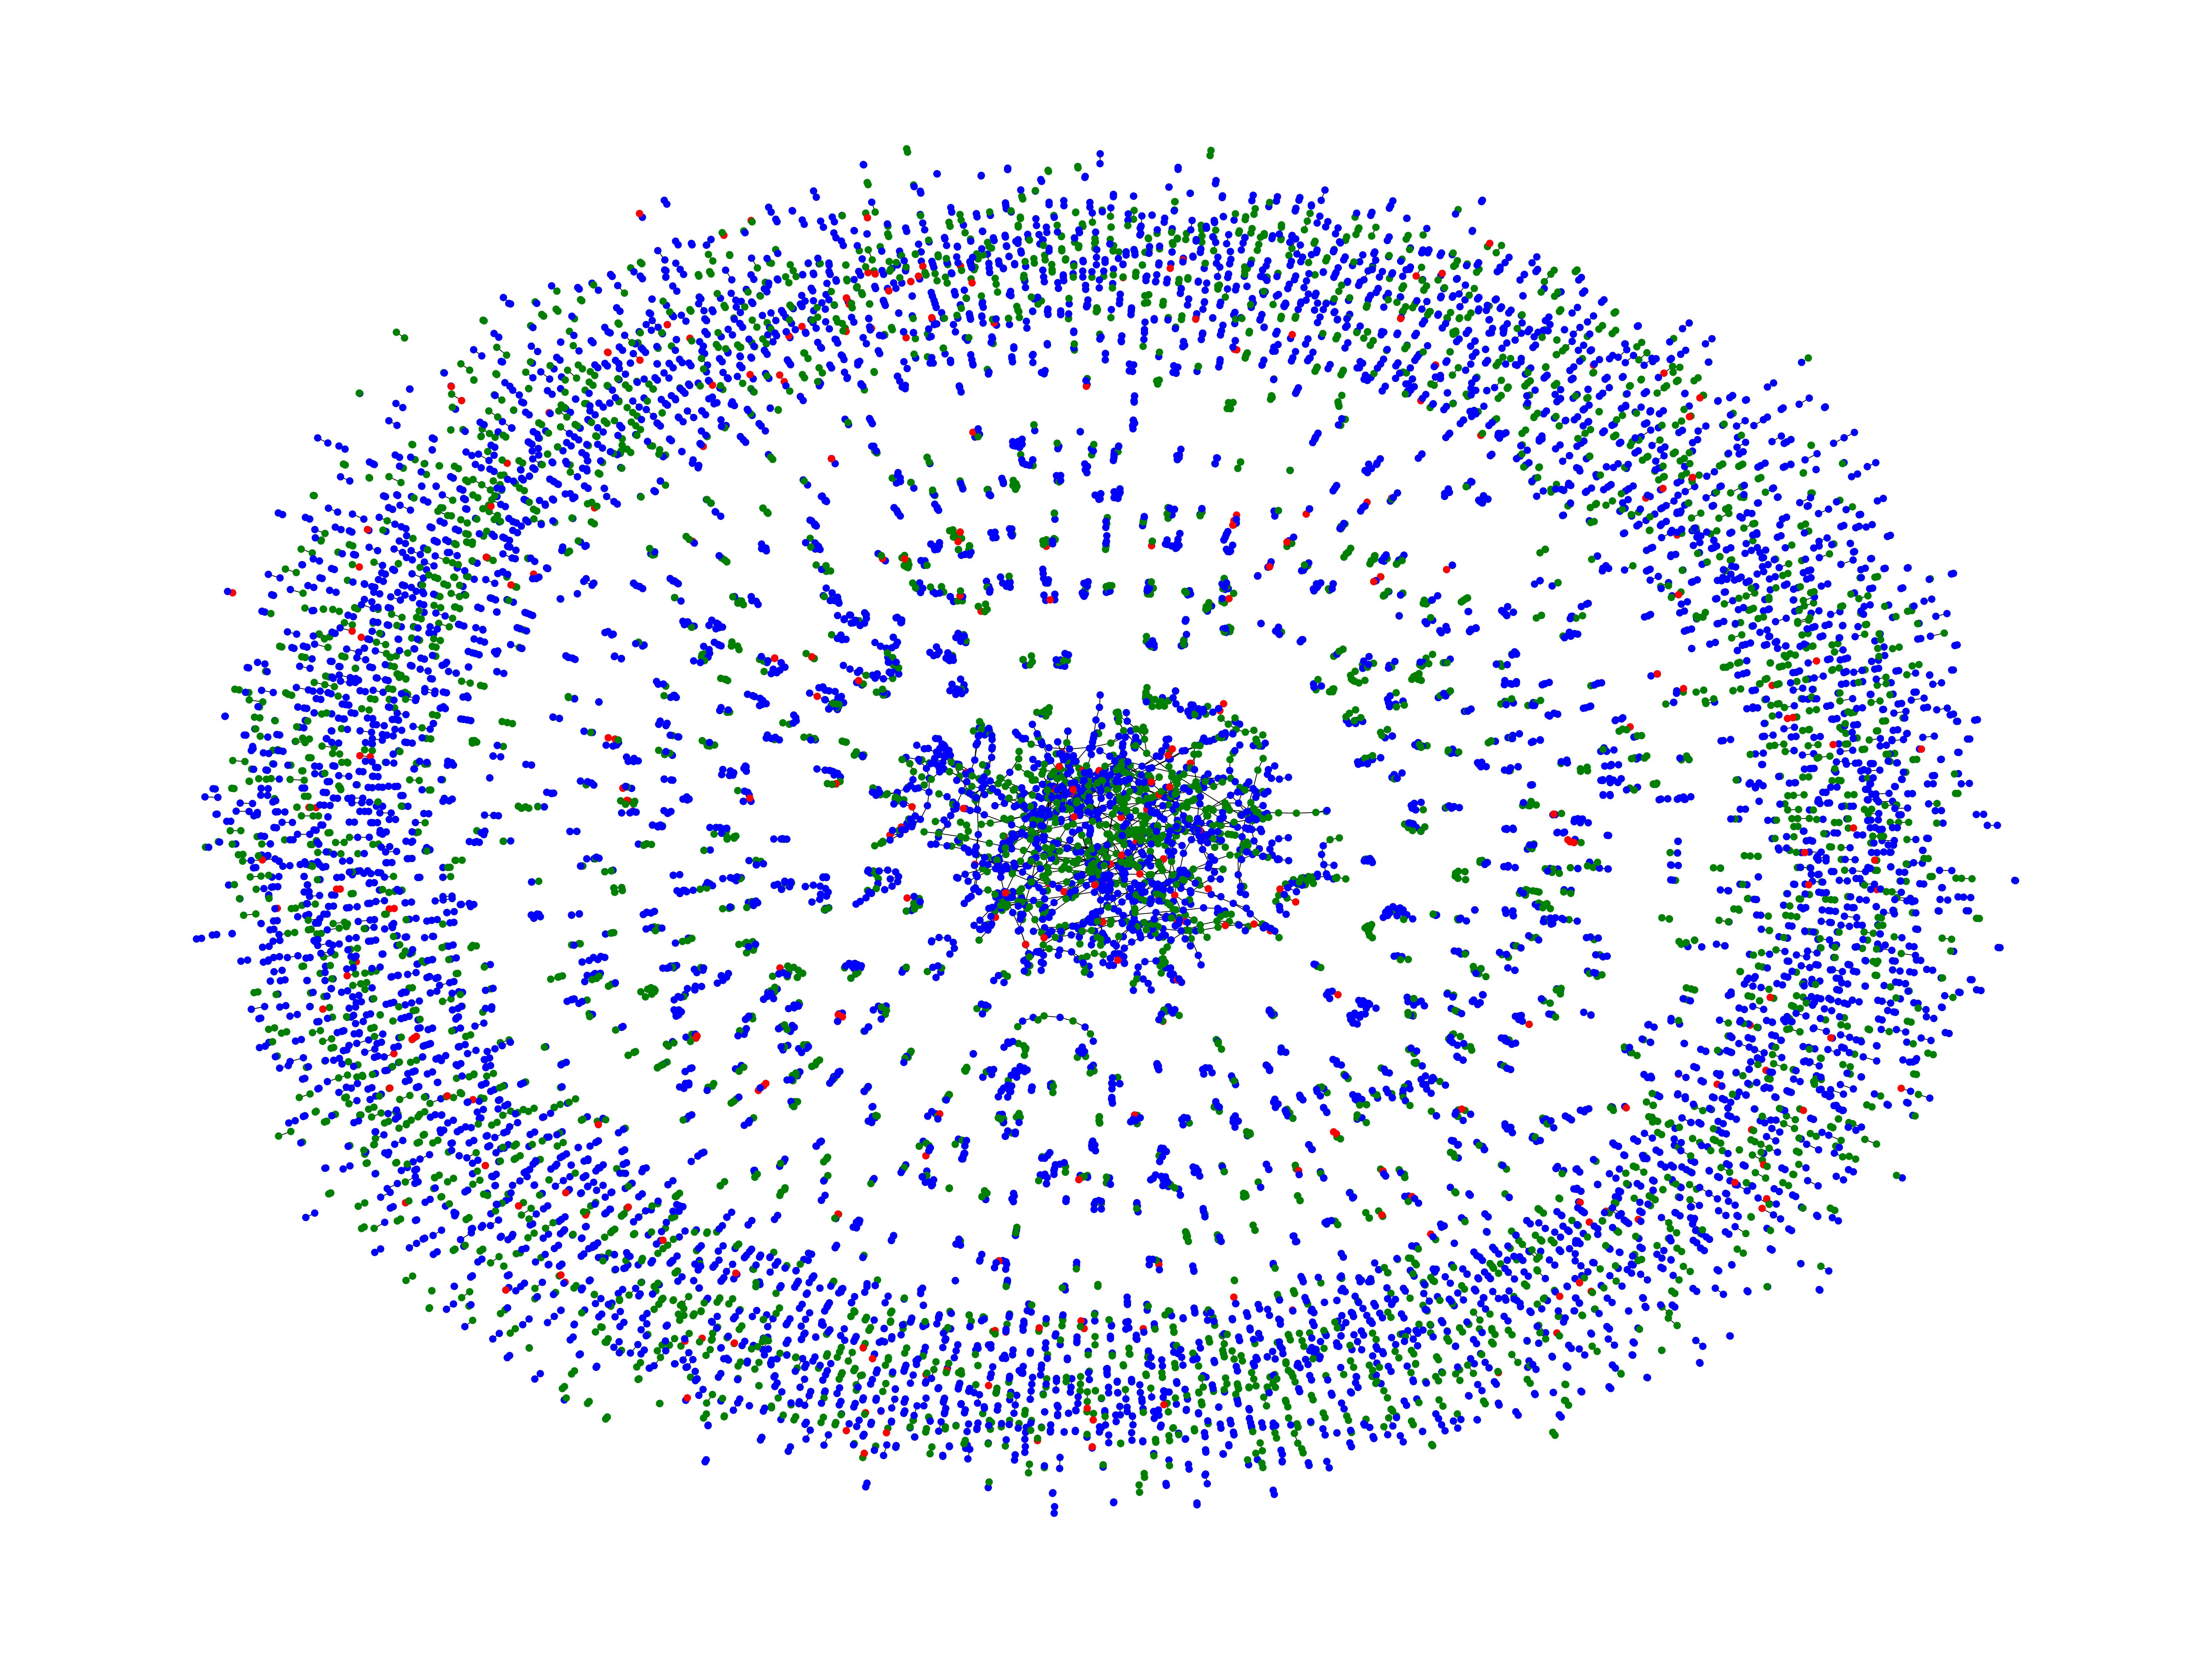

In [110]:
G3 = nx.Graph()
color_map_2 = []
for distance in proximity_distance:

    for index, row in df.loc[df[f'day14_{distance}m'] >= 1].iterrows():
        index_row = row['id']
        G3.add_node(index_row)   

        mintindex_row = False
        mintindex_row = row[f'day14_{distance}m_mintindex']
        if mintindex_row:
            G3.add_edge(mintindex_row, index_row)

for node in G3:
    temp = df.loc[df['id'] == node].crime.values[0]
    if temp == 'burglary_residence':
        color_map_2.append('blue')
    elif temp == 'burglary_business': 
        color_map_2.append('green')
    else:
        color_map_2.append('red')

print(f'Color {len(color_map_2)}')
print(f'Nodes: {G3.number_of_nodes()}')
print(f'Edges: {G3.number_of_edges()}')

nodesize = 75
width = 1
figsize_width = 40
figsize_height = 30
label = False
fontsize = 45

fig = plt.figure(1, figsize=(figsize_width, figsize_height), dpi=150)

nx.draw(G3, with_labels=label, node_size=nodesize, width=width, node_color=color_map_2)
plt.show()

----
# 5. Network properties
TODO: description